# Install MMSegmentation

In [ ]:
!nvidia-smi # Tesla P100이 출력되지 않으면 "런타임 초기화"

Sat Jun  4 14:23:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.11.0+cu113 True


In [ ]:
# Install MMCV
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 46.4 MB 131 kB/s 
     |████████████████████████████████| 190 kB 5.4 MB/s 


In [ ]:
!rm -rf mmsegmentation
!git clone https://github.com/museonghwang/mmsegmentation.git
#!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 7003, done.
remote: Total 7003 (delta 0), reused 0 (delta 0), pack-reused 7003
Receiving objects: 100% (7003/7003), 12.82 MiB | 34.92 MiB/s, done.
Resolving deltas: 100% (5191/5191), done.
/content/mmsegmentation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmsegmentation
     |████████████████████████████████| 577 kB 5.0 MB/s 
     |████████████████████████████████| 631 kB 56.4 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654017 sha256=badbd5dd79d5baf1a8edca8d4f9511aacc9be67f7b7edab17e1f09b7ca07cf70
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Running setup.py develop for mms

In [ ]:
# 런타임 -> 런타임 "다시 시작" 후 아래 수행. 
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.11.0+cu113 True
0.24.1


# Run Inference with MMSeg trained weight

In [ ]:
%cd mmsegmentation
!mkdir checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth -P checkpoints

/content/mmsegmentation
--2022-05-23 09:21:22--  https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.233
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328290585 (313M) [application/octet-stream]
Saving to: ‘checkpoints/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth’

segformer_mit-b5_8x 100%[===================>] 313.08M  13.0MB/s    in 25s     

2022-05-23 09:21:48 (12.6 MB/s) - ‘checkpoints/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth’ saved [328290585/328290585]



In [ ]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [ ]:
config_file = '/content/mmsegmentation/configs/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes.py'
checkpoint_file = '/content/mmsegmentation/checkpoints/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth'

In [ ]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


load checkpoint from local path: /content/mmsegmentation/checkpoints/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth


In [ ]:
# test a single image
img = '/content/mmsegmentation/demo/demo.png'
result = inference_segmentor(model, img)

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


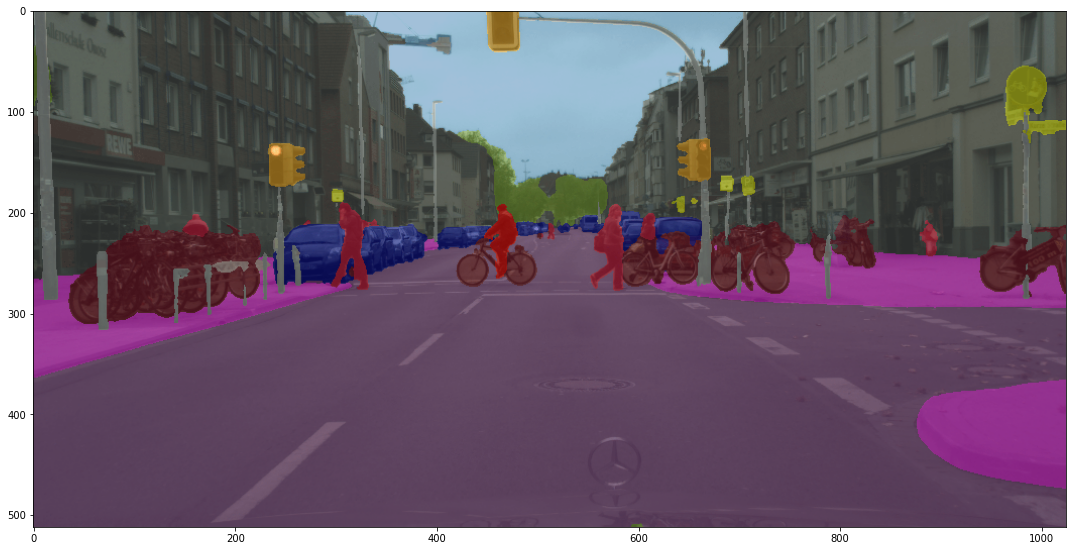

In [ ]:
# show the results
show_result_pyplot(model, img, result, get_palette('cityscapes'))

## Train a semantic segmentation model on a new dataset

To train on a customized dataset, the following steps are necessary. 
1. Add a new dataset class. 
2. Create a config file accordingly. 
3. Perform training and evaluation. 

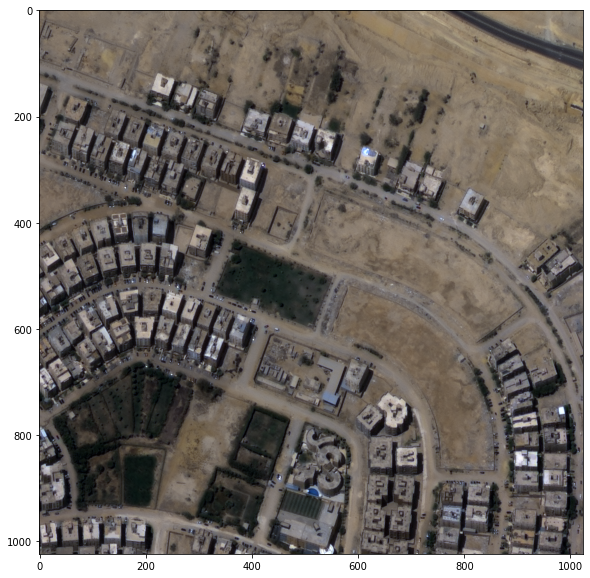

In [ ]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/train/road/image/BLD00057_PS3_K3A_NIA0276.png')
plt.figure(figsize=(10, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
import os.path as osp
import numpy as np
from PIL import Image
import cv2

# convert dataset annotation to semantic segmentation map
data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road'
img_dir = 'image'
ann_dir = 'annotation'

# define class and plaette for better visualization
classes = ('background', 'road')
palette = [[0, 0, 0], [255, 0, 255]]

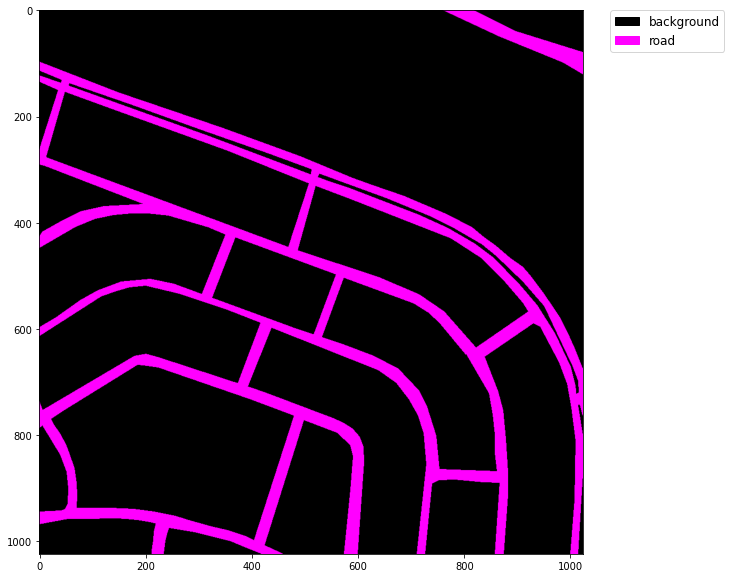

In [ ]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches

img = Image.open('/content/drive/Shareddrives/msmg/level1/dataset/train/road/annotation/BLD00057_PS3_K3A_NIA0276.png')
plt.figure(figsize=(10, 10))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(2)]

# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')

plt.show()

# Create a config file
In the next step, we need to modify the config for the training. To accelerate the process, we finetune the model from trained weights.

In [ ]:
config_file = '/content/mmsegmentation/configs/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes.py'
checkpoint_file = '/content/mmsegmentation/checkpoints/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth'
save_pth_path = '/content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint'

In [ ]:
# convert dataset annotation to semantic segmentation map
data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road'
img_dir = 'image'
ann_dir = 'annotation'

# define class and plaette for better visualization
classes = ('background', 'road')
palette = [[0, 0, 0], [255, 0, 255]]

In [ ]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module(force=True)
class RoadSemanticSegmentation(CustomDataset):
    CLASSES = classes
    PALETTE = palette
    def __init__(self, split, **kwargs):
        super().__init__(img_suffix='.png', seg_map_suffix='.png', split=split, **kwargs)
        assert osp.exists(self.img_dir) and self.split is not None

In [ ]:

from mmcv import Config

cfg = Config.fromfile(config_file)

In [ ]:
from mmseg.apis import set_random_seed

# add CLASSES and PALETTE to checkpoint
cfg.checkpoint_config.meta = dict(
    CLASSES=classes,
    PALETTE=palette)

# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
#cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg

# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 2

# modify loss function crossentropy
cfg.model.decode_head.loss_decode= [dict(type='FocalLoss',loss_name = 'loss_focal', alpha = 0.8, loss_weight=0.8),
                                    dict(type='LovaszLoss',loss_name = 'loss_lovasz',per_image=False, 
																		 reduction='none',  loss_type='multi_class',classes='all',class_weight=[0.5, 1.0], loss_weight=0.2)]
    
#cfg.model.test_cfg.mode = 'whole'
#del cfg['model']['test_cfg']['crop_size']
#del cfg['model']['test_cfg']['stride']

# Modify dataset type and path
cfg.dataset_type = 'RoadSemanticSegmentation'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 6
cfg.data.workers_per_gpu = 6

# Albumentations transforms settings
albu_train_transforms = [
    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomRotate90', p=1.0)
    ], p=0.5),

    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomBrightnessContrast',brightness_limit=0.1, contrast_limit=0.15, p=1.0),
        dict(type='CLAHE', clip_limit=4.0, tile_grid_size=(8, 8), always_apply=False, p=1.0),
        dict(type='HueSaturationValue', hue_shift_limit=15, sat_shift_limit=25, val_shift_limit=10, p=1.0),
    ], p=0.5)
]

# pipline
cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (512, 512)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(1024, 1024), ratio_range=(0.5, 1.5)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(
        type='Albu',
        transforms=albu_train_transforms,
        keymap=dict(img='image', gt_semantic_seg='mask'),
        update_pad_shape=True,
        ),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1024, 1024),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]

cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road/'
cfg.data.train.img_dir = 'image'
cfg.data.train.ann_dir = 'annotation'
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'split/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/road/'
cfg.data.val.img_dir = 'image'
cfg.data.val.ann_dir = 'annotation'
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'split/validation.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/road/'
cfg.data.test.img_dir = 'image'
cfg.data.test.ann_dir = 'annotation'
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'split/validation.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = checkpoint_file

# Set up working dir to save files and logs.
cfg.work_dir = save_pth_path

cfg.runner.max_iters = 10000
cfg.log_config.interval = 10
cfg.evaluation.interval = 100
cfg.evaluation.save_best = 'mIoU'
cfg.checkpoint_config.interval = 2000

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained=None,
    backbone=dict(
        type='MixVisionTransformer',
        in_channels=3,
        embed_dims=64,
        num_stages=4,
        num_layers=[3, 6, 40, 3],
        num_heads=[1, 2, 5, 8],
        patch_sizes=[7, 3, 3, 3],
        sr_ratios=[8, 4, 2, 1],
        out_indices=(0, 1, 2, 3),
        mlp_ratio=4,
        qkv_bias=True,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.1,
        init_cfg=dict(type='Pretrained', checkpoint='pretrain/mit_b5.pth')),
    decode_head=dict(
        type='SegformerHead',
        in_channels=[64, 128, 320, 512],
        in_index=[0, 1, 2, 3],
        channels=256,
        dropout_ratio=0.1,
        num_classes=2,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=[
            dict(
                type='FocalLoss',
                loss_name='loss_focal',


# Train and Evaluation

In [ ]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor

# Build the dataset
datasets = [build_dataset(cfg.data.train)]

2022-05-23 09:22:32,755 - mmseg - INFO - Loaded 1144 images


In [ ]:
# Build the detector
model = build_segmentor(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

In [ ]:
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, meta=dict())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2022-05-23 09:22:35,617 - mmseg - INFO - Loaded 127 images
2022-05-23 09:22:35,622 - mmseg - INFO - load checkpoint from local path: /content/mmsegmentation/checkpoints/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth
2022-05-23 09:22:36,103 - mmseg - WARNING - The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([19, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([2, 256, 1, 1]).
size mismatch for decode

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 1.1 task/s, elapsed: 115s, ETA:     0s

2022-05-23 09:27:33,053 - mmseg - INFO - per class results:
2022-05-23 09:27:33,055 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 87.63 | 96.75 |
|    road    | 11.16 | 14.15 |
+------------+-------+-------+
2022-05-23 09:27:33,056 - mmseg - INFO - Summary:
2022-05-23 09:27:33,058 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 87.82 | 49.39 | 55.45 |
+-------+-------+-------+
2022-05-23 09:27:40,701 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_100.pth.
2022-05-23 09:27:40,704 - mmseg - INFO - Best mIoU is 0.4939 at 100 iter.
2022-05-23 09:27:40,709 - mmseg - INFO - Iter(val) [127]	aAcc: 0.8782, mIoU: 0.4939, mAcc: 0.5545, IoU.background: 0.8763, IoU.road: 0.1116, Acc.background: 0.9675, Acc.road: 0.1415
2022-05-23 09:27:57,666 - mmseg - INFO - Iter [110/10000]	lr: 4.313e-06, eta: 7:58:25, time: 14.007, data_time: 12.321, memory: 13841, de

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 09:31:19,926 - mmseg - INFO - per class results:
2022-05-23 09:31:19,930 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 89.82 | 94.45 |
|    road    | 39.43 |  57.5 |
+------------+-------+-------+
2022-05-23 09:31:19,932 - mmseg - INFO - Summary:
2022-05-23 09:31:19,936 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.45 | 64.62 | 75.97 |
+-------+-------+-------+
2022-05-23 09:31:19,949 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_100.pth was removed
2022-05-23 09:31:27,336 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_200.pth.
2022-05-23 09:31:27,337 - mmseg - INFO - Best mIoU is 0.6462 at 200 iter.
2022-05-23 09:31:27,343 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9045, mIoU: 0.6462, mAcc: 0.7597, IoU.background: 0.8982, IoU

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 09:34:59,705 - mmseg - INFO - per class results:
2022-05-23 09:34:59,706 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 91.01 | 94.76 |
|    road    | 46.05 | 65.95 |
+------------+-------+-------+
2022-05-23 09:34:59,707 - mmseg - INFO - Summary:
2022-05-23 09:34:59,710 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 91.65 | 68.53 | 80.36 |
+-------+-------+-------+
2022-05-23 09:34:59,721 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_200.pth was removed
2022-05-23 09:35:06,882 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_300.pth.
2022-05-23 09:35:06,888 - mmseg - INFO - Best mIoU is 0.6853 at 300 iter.
2022-05-23 09:35:06,889 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9165, mIoU: 0.6853, mAcc: 0.8036, IoU.background: 0.9101, IoU

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 09:38:44,662 - mmseg - INFO - per class results:
2022-05-23 09:38:44,664 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.02 | 95.72 |
|    road    |  49.4 | 66.85 |
+------------+-------+-------+
2022-05-23 09:38:44,665 - mmseg - INFO - Summary:
2022-05-23 09:38:44,667 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 92.6 | 70.71 | 81.29 |
+------+-------+-------+
2022-05-23 09:38:44,679 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_300.pth was removed
2022-05-23 09:38:51,866 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_400.pth.
2022-05-23 09:38:51,867 - mmseg - INFO - Best mIoU is 0.7071 at 400 iter.
2022-05-23 09:38:51,869 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9260, mIoU: 0.7071, mAcc: 0.8129, IoU.background: 0.9202, IoU.road

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 09:42:23,679 - mmseg - INFO - per class results:
2022-05-23 09:42:23,681 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 91.85 | 94.85 |
|    road    | 51.26 | 73.03 |
+------------+-------+-------+
2022-05-23 09:42:23,684 - mmseg - INFO - Summary:
2022-05-23 09:42:23,687 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 92.49 | 71.55 | 83.94 |
+-------+-------+-------+
2022-05-23 09:42:23,701 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_400.pth was removed
2022-05-23 09:42:30,793 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_500.pth.
2022-05-23 09:42:30,794 - mmseg - INFO - Best mIoU is 0.7155 at 500 iter.
2022-05-23 09:42:30,796 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9249, mIoU: 0.7155, mAcc: 0.8394, IoU.background: 0.9185, IoU

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 09:46:08,283 - mmseg - INFO - per class results:
2022-05-23 09:46:08,286 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.17 |  95.2 |
|    road    | 52.21 | 72.87 |
+------------+-------+-------+
2022-05-23 09:46:08,288 - mmseg - INFO - Summary:
2022-05-23 09:46:08,291 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 92.79 | 72.19 | 84.04 |
+-------+-------+-------+
2022-05-23 09:46:08,299 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_500.pth was removed
2022-05-23 09:46:15,161 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_600.pth.
2022-05-23 09:46:15,162 - mmseg - INFO - Best mIoU is 0.7219 at 600 iter.
2022-05-23 09:46:15,169 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9279, mIoU: 0.7219, mAcc: 0.8404, IoU.background: 0.9217, IoU

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 09:49:47,714 - mmseg - INFO - per class results:
2022-05-23 09:49:47,718 - mmseg - INFO - 
+------------+------+-------+
|   Class    | IoU  |  Acc  |
+------------+------+-------+
| background | 92.6 | 95.86 |
|    road    | 52.9 | 70.96 |
+------------+------+-------+
2022-05-23 09:49:47,719 - mmseg - INFO - Summary:
2022-05-23 09:49:47,722 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.17 | 72.75 | 83.41 |
+-------+-------+-------+
2022-05-23 09:49:47,737 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_600.pth was removed
2022-05-23 09:49:54,877 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_700.pth.
2022-05-23 09:49:54,878 - mmseg - INFO - Best mIoU is 0.7275 at 700 iter.
2022-05-23 09:49:54,883 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9317, mIoU: 0.7275, mAcc: 0.8341, IoU.background: 0.9260, IoU.road:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 09:53:31,991 - mmseg - INFO - per class results:
2022-05-23 09:53:31,994 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.99 | 95.92 |
|    road    | 55.33 | 73.96 |
+------------+-------+-------+
2022-05-23 09:53:31,999 - mmseg - INFO - Summary:
2022-05-23 09:53:32,000 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.55 | 74.16 | 84.94 |
+-------+-------+-------+
2022-05-23 09:53:32,014 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_700.pth was removed
2022-05-23 09:53:39,195 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_800.pth.
2022-05-23 09:53:39,196 - mmseg - INFO - Best mIoU is 0.7416 at 800 iter.
2022-05-23 09:53:39,199 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9355, mIoU: 0.7416, mAcc: 0.8494, IoU.background: 0.9299, IoU

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 09:57:11,363 - mmseg - INFO - per class results:
2022-05-23 09:57:11,366 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.75 |  97.4 |
|    road    | 55.87 | 67.84 |
+------------+-------+-------+
2022-05-23 09:57:11,367 - mmseg - INFO - Summary:
2022-05-23 09:57:11,370 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.21 | 74.81 | 82.62 |
+-------+-------+-------+
2022-05-23 09:57:11,381 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_800.pth was removed
2022-05-23 09:57:19,086 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_900.pth.
2022-05-23 09:57:19,087 - mmseg - INFO - Best mIoU is 0.7481 at 900 iter.
2022-05-23 09:57:19,093 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9421, mIoU: 0.7481, mAcc: 0.8262, IoU.background: 0.9375, IoU

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 10:00:56,626 - mmseg - INFO - per class results:
2022-05-23 10:00:56,628 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.62 | 97.05 |
|    road    | 56.15 | 69.83 |
+------------+-------+-------+
2022-05-23 10:00:56,631 - mmseg - INFO - Summary:
2022-05-23 10:00:56,634 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.11 | 74.89 | 83.44 |
+-------+-------+-------+
2022-05-23 10:00:56,647 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_900.pth was removed
2022-05-23 10:01:04,095 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1000.pth.
2022-05-23 10:01:04,097 - mmseg - INFO - Best mIoU is 0.7489 at 1000 iter.
2022-05-23 10:01:04,100 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9411, mIoU: 0.7489, mAcc: 0.8344, IoU.background: 0.9362, I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 10:04:36,148 - mmseg - INFO - per class results:
2022-05-23 10:04:36,150 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  93.2 | 96.63 |
|    road    | 54.45 | 69.58 |
+------------+-------+-------+
2022-05-23 10:04:36,153 - mmseg - INFO - Summary:
2022-05-23 10:04:36,155 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.71 | 73.82 | 83.11 |
+-------+-------+-------+
2022-05-23 10:04:36,158 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9371, mIoU: 0.7382, mAcc: 0.8311, IoU.background: 0.9320, IoU.road: 0.5445, Acc.background: 0.9663, Acc.road: 0.6958
2022-05-23 10:04:52,724 - mmseg - INFO - Iter [1110/10000]	lr: 3.944e-05, eta: 5:38:17, time: 6.245, data_time: 4.599, memory: 13841, decode.loss_focal: 0.0166, decode.loss_lovasz: 0.0526, decode.acc_seg: 92.5082, loss: 0.0692
2022-05-23 10:05:09,289 - mmseg - INFO - Iter [1120/10000]	lr: 3.975e-05, eta: 5:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 10:08:12,425 - mmseg - INFO - per class results:
2022-05-23 10:08:12,428 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  92.7 | 94.98 |
|    road    | 56.37 | 79.74 |
+------------+-------+-------+
2022-05-23 10:08:12,429 - mmseg - INFO - Summary:
2022-05-23 10:08:12,431 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.33 | 74.54 | 87.36 |
+-------+-------+-------+
2022-05-23 10:08:12,435 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9333, mIoU: 0.7454, mAcc: 0.8736, IoU.background: 0.9270, IoU.road: 0.5637, Acc.background: 0.9498, Acc.road: 0.7974
2022-05-23 10:08:29,000 - mmseg - INFO - Iter [1210/10000]	lr: 4.251e-05, eta: 5:33:01, time: 6.223, data_time: 4.576, memory: 13841, decode.loss_focal: 0.0138, decode.loss_lovasz: 0.0495, decode.acc_seg: 93.6231, loss: 0.0633
2022-05-23 10:08:45,539 - mmseg - INFO - Iter [1220/10000]	lr: 4.282e-05, eta: 5:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 10:11:43,490 - mmseg - INFO - per class results:
2022-05-23 10:11:43,492 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.28 | 96.42 |
|    road    | 55.79 | 72.29 |
+------------+-------+-------+
2022-05-23 10:11:43,493 - mmseg - INFO - Summary:
2022-05-23 10:11:43,497 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.81 | 74.54 | 84.35 |
+-------+-------+-------+
2022-05-23 10:11:43,500 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9381, mIoU: 0.7454, mAcc: 0.8435, IoU.background: 0.9328, IoU.road: 0.5579, Acc.background: 0.9642, Acc.road: 0.7229
2022-05-23 10:12:00,063 - mmseg - INFO - Iter [1310/10000]	lr: 4.551e-05, eta: 5:27:26, time: 6.212, data_time: 4.566, memory: 13841, decode.loss_focal: 0.0161, decode.loss_lovasz: 0.0523, decode.acc_seg: 92.7600, loss: 0.0685
2022-05-23 10:12:16,600 - mmseg - INFO - Iter [1320/10000]	lr: 4.580e-05, eta: 5:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 10:15:19,887 - mmseg - INFO - per class results:
2022-05-23 10:15:19,891 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.94 | 97.44 |
|    road    | 57.15 | 69.23 |
+------------+-------+-------+
2022-05-23 10:15:19,897 - mmseg - INFO - Summary:
2022-05-23 10:15:19,898 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.39 | 75.54 | 83.33 |
+-------+-------+-------+
2022-05-23 10:15:19,903 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_1000.pth was removed
2022-05-23 10:15:27,100 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1400.pth.
2022-05-23 10:15:27,101 - mmseg - INFO - Best mIoU is 0.7554 at 1400 iter.
2022-05-23 10:15:27,103 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9439, mIoU: 0.7554, mAcc: 0.8333, IoU.background: 0.9394, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 10:18:59,169 - mmseg - INFO - per class results:
2022-05-23 10:18:59,171 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.24 | 97.89 |
|    road    | 57.93 | 68.02 |
+------------+-------+-------+
2022-05-23 10:18:59,172 - mmseg - INFO - Summary:
2022-05-23 10:18:59,178 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.66 | 76.08 | 82.96 |
+-------+-------+-------+
2022-05-23 10:18:59,188 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_1400.pth was removed
2022-05-23 10:19:06,180 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1500.pth.
2022-05-23 10:19:06,182 - mmseg - INFO - Best mIoU is 0.7608 at 1500 iter.
2022-05-23 10:19:06,186 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9466, mIoU: 0.7608, mAcc: 0.8296, IoU.background: 0.9424, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 10:22:43,281 - mmseg - INFO - per class results:
2022-05-23 10:22:43,284 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  93.6 |  96.2 |
|    road    | 58.65 | 77.02 |
+------------+-------+-------+
2022-05-23 10:22:43,287 - mmseg - INFO - Summary:
2022-05-23 10:22:43,288 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.13 | 76.12 | 86.61 |
+-------+-------+-------+
2022-05-23 10:22:43,300 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_1500.pth was removed
2022-05-23 10:22:50,497 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1600.pth.
2022-05-23 10:22:50,498 - mmseg - INFO - Best mIoU is 0.7612 at 1600 iter.
2022-05-23 10:22:50,502 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9413, mIoU: 0.7612, mAcc: 0.8661, IoU.background: 0.9360, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 10:26:22,250 - mmseg - INFO - per class results:
2022-05-23 10:26:22,252 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.77 | 96.68 |
|    road    | 58.42 | 74.44 |
+------------+-------+-------+
2022-05-23 10:26:22,255 - mmseg - INFO - Summary:
2022-05-23 10:26:22,257 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.27 | 76.1 | 85.56 |
+-------+------+-------+
2022-05-23 10:26:22,260 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9427, mIoU: 0.7610, mAcc: 0.8556, IoU.background: 0.9377, IoU.road: 0.5842, Acc.background: 0.9668, Acc.road: 0.7444
2022-05-23 10:26:38,735 - mmseg - INFO - Iter [1710/10000]	lr: 4.975e-05, eta: 5:10:17, time: 6.217, data_time: 4.580, memory: 13841, decode.loss_focal: 0.0154, decode.loss_lovasz: 0.0541, decode.acc_seg: 93.0237, loss: 0.0695
2022-05-23 10:27:00,803 - mmseg - INFO - Iter [1720/10000]	lr: 4.969e-05, eta: 5:09:53

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 10:29:58,981 - mmseg - INFO - per class results:
2022-05-23 10:29:58,984 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.06 | 96.65 |
|    road    | 60.55 | 77.28 |
+------------+-------+-------+
2022-05-23 10:29:58,985 - mmseg - INFO - Summary:
2022-05-23 10:29:58,991 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.56 | 77.3 | 86.97 |
+-------+------+-------+
2022-05-23 10:29:59,005 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_1600.pth was removed
2022-05-23 10:30:06,209 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1800.pth.
2022-05-23 10:30:06,210 - mmseg - INFO - Best mIoU is 0.7730 at 1800 iter.
2022-05-23 10:30:06,215 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9456, mIoU: 0.7730, mAcc: 0.8697, IoU.background: 0.9406, IoU.r

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 10:33:38,049 - mmseg - INFO - per class results:
2022-05-23 10:33:38,050 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.56 | 96.12 |
|    road    | 58.65 | 77.45 |
+------------+-------+-------+
2022-05-23 10:33:38,053 - mmseg - INFO - Summary:
2022-05-23 10:33:38,056 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.1 | 76.11 | 86.78 |
+------+-------+-------+
2022-05-23 10:33:38,060 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9410, mIoU: 0.7611, mAcc: 0.8678, IoU.background: 0.9356, IoU.road: 0.5865, Acc.background: 0.9612, Acc.road: 0.7745
2022-05-23 10:34:00,016 - mmseg - INFO - Iter [1910/10000]	lr: 4.855e-05, eta: 5:02:15, time: 6.790, data_time: 5.058, memory: 13841, decode.loss_focal: 0.0137, decode.loss_lovasz: 0.0473, decode.acc_seg: 93.4657, loss: 0.0610
2022-05-23 10:34:16,560 - mmseg - INFO - Iter [1920/10000]	lr: 4.849e-05, eta: 5:01:28

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 10:37:23,224 - mmseg - INFO - per class results:
2022-05-23 10:37:23,227 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.86 | 96.78 |
|    road    | 58.74 | 74.36 |
+------------+-------+-------+
2022-05-23 10:37:23,228 - mmseg - INFO - Summary:
2022-05-23 10:37:23,232 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.35 | 76.3 | 85.57 |
+-------+------+-------+
2022-05-23 10:37:23,238 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9435, mIoU: 0.7630, mAcc: 0.8557, IoU.background: 0.9386, IoU.road: 0.5874, Acc.background: 0.9678, Acc.road: 0.7436
2022-05-23 10:37:39,795 - mmseg - INFO - Iter [2010/10000]	lr: 4.795e-05, eta: 4:58:13, time: 6.319, data_time: 4.674, memory: 13841, decode.loss_focal: 0.0135, decode.loss_lovasz: 0.0505, decode.acc_seg: 93.5306, loss: 0.0639
2022-05-23 10:37:56,358 - mmseg - INFO - Iter [2020/10000]	lr: 4.789e-05, eta: 4:57:28

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 10:40:59,906 - mmseg - INFO - per class results:
2022-05-23 10:40:59,908 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.1 | 97.15 |
|    road    | 59.32 | 73.25 |
+------------+-------+-------+
2022-05-23 10:40:59,909 - mmseg - INFO - Summary:
2022-05-23 10:40:59,912 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.57 | 76.71 | 85.2 |
+-------+-------+------+
2022-05-23 10:40:59,918 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9457, mIoU: 0.7671, mAcc: 0.8520, IoU.background: 0.9410, IoU.road: 0.5932, Acc.background: 0.9715, Acc.road: 0.7325
2022-05-23 10:41:16,480 - mmseg - INFO - Iter [2110/10000]	lr: 4.735e-05, eta: 4:54:02, time: 6.243, data_time: 4.597, memory: 13841, decode.loss_focal: 0.0162, decode.loss_lovasz: 0.0468, decode.acc_seg: 93.1008, loss: 0.0630
2022-05-23 10:41:33,056 - mmseg - INFO - Iter [2120/10000]	lr: 4.729e-05, eta: 4:53:18

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 10:44:31,361 - mmseg - INFO - per class results:
2022-05-23 10:44:31,364 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.82 | 96.36 |
|    road    | 59.75 | 77.69 |
+------------+-------+-------+
2022-05-23 10:44:31,368 - mmseg - INFO - Summary:
2022-05-23 10:44:31,371 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.34 | 76.78 | 87.03 |
+-------+-------+-------+
2022-05-23 10:44:31,374 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9434, mIoU: 0.7678, mAcc: 0.8703, IoU.background: 0.9382, IoU.road: 0.5975, Acc.background: 0.9636, Acc.road: 0.7769
2022-05-23 10:44:47,957 - mmseg - INFO - Iter [2210/10000]	lr: 4.675e-05, eta: 4:49:36, time: 6.247, data_time: 4.599, memory: 13841, decode.loss_focal: 0.0140, decode.loss_lovasz: 0.0445, decode.acc_seg: 94.3592, loss: 0.0585
2022-05-23 10:45:04,517 - mmseg - INFO - Iter [2220/10000]	lr: 4.669e-05, eta: 4:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 10:48:07,862 - mmseg - INFO - per class results:
2022-05-23 10:48:07,864 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.31 | 97.18 |
|    road    | 60.78 | 74.91 |
+------------+-------+-------+
2022-05-23 10:48:07,868 - mmseg - INFO - Summary:
2022-05-23 10:48:07,872 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.77 | 77.55 | 86.05 |
+-------+-------+-------+
2022-05-23 10:48:07,877 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_1800.pth was removed
2022-05-23 10:48:15,019 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_2300.pth.
2022-05-23 10:48:15,021 - mmseg - INFO - Best mIoU is 0.7755 at 2300 iter.
2022-05-23 10:48:15,028 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9477, mIoU: 0.7755, mAcc: 0.8605, IoU.background: 0.9431, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 10:51:47,639 - mmseg - INFO - per class results:
2022-05-23 10:51:47,642 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.32 | 97.16 |
|    road    | 60.87 | 75.14 |
+------------+-------+-------+
2022-05-23 10:51:47,643 - mmseg - INFO - Summary:
2022-05-23 10:51:47,650 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.78 | 77.6 | 86.15 |
+-------+------+-------+
2022-05-23 10:51:47,668 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_2300.pth was removed
2022-05-23 10:51:54,696 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_2400.pth.
2022-05-23 10:51:54,698 - mmseg - INFO - Best mIoU is 0.7760 at 2400 iter.
2022-05-23 10:51:54,703 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9478, mIoU: 0.7760, mAcc: 0.8615, IoU.background: 0.9432, IoU.r

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 10:55:31,783 - mmseg - INFO - per class results:
2022-05-23 10:55:31,787 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  93.6 |  95.9 |
|    road    | 59.57 | 79.72 |
+------------+-------+-------+
2022-05-23 10:55:31,790 - mmseg - INFO - Summary:
2022-05-23 10:55:31,793 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.15 | 76.59 | 87.81 |
+-------+-------+-------+
2022-05-23 10:55:31,796 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9415, mIoU: 0.7659, mAcc: 0.8781, IoU.background: 0.9360, IoU.road: 0.5957, Acc.background: 0.9590, Acc.road: 0.7972
2022-05-23 10:55:48,354 - mmseg - INFO - Iter [2510/10000]	lr: 4.495e-05, eta: 4:38:00, time: 6.254, data_time: 4.608, memory: 13841, decode.loss_focal: 0.0149, decode.loss_lovasz: 0.0487, decode.acc_seg: 92.9734, loss: 0.0636
2022-05-23 10:56:04,958 - mmseg - INFO - Iter [2520/10000]	lr: 4.489e-05, eta: 4:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 10:59:03,194 - mmseg - INFO - per class results:
2022-05-23 10:59:03,196 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.0 | 96.41 |
|    road    | 60.83 | 78.84 |
+------------+-------+-------+
2022-05-23 10:59:03,198 - mmseg - INFO - Summary:
2022-05-23 10:59:03,204 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.51 | 77.41 | 87.63 |
+-------+-------+-------+
2022-05-23 10:59:03,207 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9451, mIoU: 0.7741, mAcc: 0.8763, IoU.background: 0.9400, IoU.road: 0.6083, Acc.background: 0.9641, Acc.road: 0.7884
2022-05-23 10:59:19,783 - mmseg - INFO - Iter [2610/10000]	lr: 4.435e-05, eta: 4:33:46, time: 6.236, data_time: 4.589, memory: 13841, decode.loss_focal: 0.0153, decode.loss_lovasz: 0.0484, decode.acc_seg: 93.7443, loss: 0.0637
2022-05-23 10:59:36,346 - mmseg - INFO - Iter [2620/10000]	lr: 4.429e-05, eta: 4:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 11:02:40,008 - mmseg - INFO - per class results:
2022-05-23 11:02:40,012 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.43 | 97.83 |
|    road    | 59.64 | 70.32 |
+------------+-------+-------+
2022-05-23 11:02:40,016 - mmseg - INFO - Summary:
2022-05-23 11:02:40,021 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.86 | 77.04 | 84.08 |
+-------+-------+-------+
2022-05-23 11:02:40,023 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9486, mIoU: 0.7704, mAcc: 0.8408, IoU.background: 0.9443, IoU.road: 0.5964, Acc.background: 0.9783, Acc.road: 0.7032
2022-05-23 11:02:56,604 - mmseg - INFO - Iter [2710/10000]	lr: 4.375e-05, eta: 4:29:49, time: 6.235, data_time: 4.587, memory: 13841, decode.loss_focal: 0.0116, decode.loss_lovasz: 0.0416, decode.acc_seg: 94.8704, loss: 0.0533
2022-05-23 11:03:13,161 - mmseg - INFO - Iter [2720/10000]	lr: 4.369e-05, eta: 4:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 11:06:11,420 - mmseg - INFO - per class results:
2022-05-23 11:06:11,421 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.32 | 96.97 |
|    road    | 61.43 | 76.79 |
+------------+-------+-------+
2022-05-23 11:06:11,425 - mmseg - INFO - Summary:
2022-05-23 11:06:11,430 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.79 | 77.87 | 86.88 |
+-------+-------+-------+
2022-05-23 11:06:11,441 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_2400.pth was removed
2022-05-23 11:06:18,479 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_2800.pth.
2022-05-23 11:06:18,480 - mmseg - INFO - Best mIoU is 0.7787 at 2800 iter.
2022-05-23 11:06:18,489 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9479, mIoU: 0.7787, mAcc: 0.8688, IoU.background: 0.9432, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 11:09:55,856 - mmseg - INFO - per class results:
2022-05-23 11:09:55,861 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.24 | 96.99 |
|    road    | 60.82 | 75.93 |
+------------+-------+-------+
2022-05-23 11:09:55,862 - mmseg - INFO - Summary:
2022-05-23 11:09:55,864 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.71 | 77.53 | 86.46 |
+-------+-------+-------+
2022-05-23 11:09:55,866 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9471, mIoU: 0.7753, mAcc: 0.8646, IoU.background: 0.9424, IoU.road: 0.6082, Acc.background: 0.9699, Acc.road: 0.7593
2022-05-23 11:10:12,452 - mmseg - INFO - Iter [2910/10000]	lr: 4.255e-05, eta: 4:22:04, time: 6.269, data_time: 4.621, memory: 13841, decode.loss_focal: 0.0133, decode.loss_lovasz: 0.0419, decode.acc_seg: 94.4499, loss: 0.0552
2022-05-23 11:10:29,015 - mmseg - INFO - Iter [2920/10000]	lr: 4.249e-05, eta: 4:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-23 11:13:27,825 - mmseg - INFO - per class results:
2022-05-23 11:13:27,828 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.76 | 95.99 |
|    road    | 60.36 | 80.35 |
+------------+-------+-------+
2022-05-23 11:13:27,829 - mmseg - INFO - Summary:
2022-05-23 11:13:27,833 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.3 | 77.06 | 88.17 |
+------+-------+-------+
2022-05-23 11:13:27,837 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9430, mIoU: 0.7706, mAcc: 0.8817, IoU.background: 0.9376, IoU.road: 0.6036, Acc.background: 0.9599, Acc.road: 0.8035
2022-05-23 11:13:44,414 - mmseg - INFO - Iter [3010/10000]	lr: 4.195e-05, eta: 4:18:00, time: 6.282, data_time: 4.635, memory: 13841, decode.loss_focal: 0.0138, decode.loss_lovasz: 0.0491, decode.acc_seg: 93.6287, loss: 0.0629
2022-05-23 11:14:00,977 - mmseg - INFO - Iter [3020/10000]	lr: 4.189e-05, eta: 4:17:25

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 11:17:04,985 - mmseg - INFO - per class results:
2022-05-23 11:17:04,988 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.4 | 97.58 |
|    road    | 60.16 | 72.18 |
+------------+-------+-------+
2022-05-23 11:17:04,991 - mmseg - INFO - Summary:
2022-05-23 11:17:04,994 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.83 | 77.28 | 84.88 |
+-------+-------+-------+
2022-05-23 11:17:04,996 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9483, mIoU: 0.7728, mAcc: 0.8488, IoU.background: 0.9440, IoU.road: 0.6016, Acc.background: 0.9758, Acc.road: 0.7218
2022-05-23 11:17:21,561 - mmseg - INFO - Iter [3110/10000]	lr: 4.135e-05, eta: 4:14:09, time: 6.262, data_time: 4.616, memory: 13841, decode.loss_focal: 0.0122, decode.loss_lovasz: 0.0440, decode.acc_seg: 94.6254, loss: 0.0562
2022-05-23 11:17:38,139 - mmseg - INFO - Iter [3120/10000]	lr: 4.129e-05, eta: 4:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 11:20:36,920 - mmseg - INFO - per class results:
2022-05-23 11:20:36,922 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.39 |  97.2 |
|    road    |  61.3 | 75.49 |
+------------+-------+-------+
2022-05-23 11:20:36,924 - mmseg - INFO - Summary:
2022-05-23 11:20:36,926 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.85 | 77.85 | 86.34 |
+-------+-------+-------+
2022-05-23 11:20:36,928 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9485, mIoU: 0.7785, mAcc: 0.8634, IoU.background: 0.9439, IoU.road: 0.6130, Acc.background: 0.9720, Acc.road: 0.7549
2022-05-23 11:20:53,610 - mmseg - INFO - Iter [3210/10000]	lr: 4.075e-05, eta: 4:10:08, time: 6.286, data_time: 4.629, memory: 13841, decode.loss_focal: 0.0097, decode.loss_lovasz: 0.0477, decode.acc_seg: 95.5913, loss: 0.0574
2022-05-23 11:21:10,193 - mmseg - INFO - Iter [3220/10000]	lr: 4.069e-05, eta: 4:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 11:24:14,187 - mmseg - INFO - per class results:
2022-05-23 11:24:14,188 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.3 | 96.84 |
|    road    | 61.66 | 77.72 |
+------------+-------+-------+
2022-05-23 11:24:14,193 - mmseg - INFO - Summary:
2022-05-23 11:24:14,200 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.78 | 77.98 | 87.28 |
+-------+-------+-------+
2022-05-23 11:24:14,206 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_2800.pth was removed
2022-05-23 11:24:21,671 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_3300.pth.
2022-05-23 11:24:21,672 - mmseg - INFO - Best mIoU is 0.7798 at 3300 iter.
2022-05-23 11:24:21,680 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9478, mIoU: 0.7798, mAcc: 0.8728, IoU.background: 0.9430, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 11:27:53,768 - mmseg - INFO - per class results:
2022-05-23 11:27:53,771 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.45 | 97.14 |
|    road    | 61.88 | 76.48 |
+------------+-------+-------+
2022-05-23 11:27:53,772 - mmseg - INFO - Summary:
2022-05-23 11:27:53,774 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.91 | 78.16 | 86.81 |
+-------+-------+-------+
2022-05-23 11:27:53,794 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_3300.pth was removed
2022-05-23 11:28:01,124 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_3400.pth.
2022-05-23 11:28:01,125 - mmseg - INFO - Best mIoU is 0.7816 at 3400 iter.
2022-05-23 11:28:01,128 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9491, mIoU: 0.7816, mAcc: 0.8681, IoU.background: 0.9445, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 11:31:38,325 - mmseg - INFO - per class results:
2022-05-23 11:31:38,330 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.61 |  97.4 |
|    road    | 62.28 | 75.67 |
+------------+-------+-------+
2022-05-23 11:31:38,331 - mmseg - INFO - Summary:
2022-05-23 11:31:38,334 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.05 | 78.44 | 86.53 |
+-------+-------+-------+
2022-05-23 11:31:38,348 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_3400.pth was removed
2022-05-23 11:31:46,089 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_3500.pth.
2022-05-23 11:31:46,090 - mmseg - INFO - Best mIoU is 0.7844 at 3500 iter.
2022-05-23 11:31:46,098 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9505, mIoU: 0.7844, mAcc: 0.8653, IoU.background: 0.9461, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 11:35:18,080 - mmseg - INFO - per class results:
2022-05-23 11:35:18,084 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.36 | 97.16 |
|    road    | 61.19 | 75.56 |
+------------+-------+-------+
2022-05-23 11:35:18,090 - mmseg - INFO - Summary:
2022-05-23 11:35:18,092 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.82 | 77.78 | 86.36 |
+-------+-------+-------+
2022-05-23 11:35:18,095 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9482, mIoU: 0.7778, mAcc: 0.8636, IoU.background: 0.9436, IoU.road: 0.6119, Acc.background: 0.9716, Acc.road: 0.7556
2022-05-23 11:35:34,581 - mmseg - INFO - Iter [3610/10000]	lr: 3.835e-05, eta: 3:55:18, time: 6.246, data_time: 4.608, memory: 13842, decode.loss_focal: 0.0118, decode.loss_lovasz: 0.0432, decode.acc_seg: 94.5520, loss: 0.0551
2022-05-23 11:35:56,480 - mmseg - INFO - Iter [3620/10000]	lr: 3.829e-05, eta: 3:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 11:38:54,953 - mmseg - INFO - per class results:
2022-05-23 11:38:54,956 - mmseg - INFO - 
+------------+------+-------+
|   Class    | IoU  |  Acc  |
+------------+------+-------+
| background | 94.3 | 97.01 |
|    road    | 61.2 |  76.3 |
+------------+------+-------+
2022-05-23 11:38:54,957 - mmseg - INFO - Summary:
2022-05-23 11:38:54,962 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.77 | 77.75 | 86.66 |
+-------+-------+-------+
2022-05-23 11:38:54,965 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9477, mIoU: 0.7775, mAcc: 0.8666, IoU.background: 0.9430, IoU.road: 0.6120, Acc.background: 0.9701, Acc.road: 0.7630
2022-05-23 11:39:11,560 - mmseg - INFO - Iter [3710/10000]	lr: 3.775e-05, eta: 3:51:30, time: 6.256, data_time: 4.608, memory: 13842, decode.loss_focal: 0.0124, decode.loss_lovasz: 0.0407, decode.acc_seg: 94.4191, loss: 0.0530
2022-05-23 11:39:28,113 - mmseg - INFO - Iter [3720/10000]	lr: 3.769e-05, eta: 3:50:59,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 11:42:26,582 - mmseg - INFO - per class results:
2022-05-23 11:42:26,583 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.47 | 97.24 |
|    road    | 61.73 | 75.78 |
+------------+-------+-------+
2022-05-23 11:42:26,587 - mmseg - INFO - Summary:
2022-05-23 11:42:26,589 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.92 | 78.1 | 86.51 |
+-------+------+-------+
2022-05-23 11:42:26,594 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9492, mIoU: 0.7810, mAcc: 0.8651, IoU.background: 0.9447, IoU.road: 0.6173, Acc.background: 0.9724, Acc.road: 0.7578
2022-05-23 11:42:48,479 - mmseg - INFO - Iter [3810/10000]	lr: 3.715e-05, eta: 3:47:43, time: 6.791, data_time: 5.074, memory: 13842, decode.loss_focal: 0.0128, decode.loss_lovasz: 0.0409, decode.acc_seg: 94.5640, loss: 0.0538
2022-05-23 11:43:05,050 - mmseg - INFO - Iter [3820/10000]	lr: 3.709e-05, eta: 3:47:12

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 11:46:03,657 - mmseg - INFO - per class results:
2022-05-23 11:46:03,663 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.45 | 96.98 |
|    road    | 62.33 | 77.85 |
+------------+-------+-------+
2022-05-23 11:46:03,665 - mmseg - INFO - Summary:
2022-05-23 11:46:03,667 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.91 | 78.39 | 87.42 |
+-------+-------+-------+
2022-05-23 11:46:03,670 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9491, mIoU: 0.7839, mAcc: 0.8742, IoU.background: 0.9445, IoU.road: 0.6233, Acc.background: 0.9698, Acc.road: 0.7785
2022-05-23 11:46:20,266 - mmseg - INFO - Iter [3910/10000]	lr: 3.655e-05, eta: 3:43:48, time: 6.253, data_time: 4.605, memory: 13842, decode.loss_focal: 0.0136, decode.loss_lovasz: 0.0433, decode.acc_seg: 94.0757, loss: 0.0569
2022-05-23 11:46:36,868 - mmseg - INFO - Iter [3920/10000]	lr: 3.649e-05, eta: 3:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 11:49:48,696 - mmseg - INFO - per class results:
2022-05-23 11:49:48,700 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.15 | 96.52 |
|    road    | 61.55 | 79.23 |
+------------+-------+-------+
2022-05-23 11:49:48,706 - mmseg - INFO - Summary:
2022-05-23 11:49:48,715 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.65 | 77.85 | 87.88 |
+-------+-------+-------+
2022-05-23 11:49:48,716 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9465, mIoU: 0.7785, mAcc: 0.8788, IoU.background: 0.9415, IoU.road: 0.6155, Acc.background: 0.9652, Acc.road: 0.7923
2022-05-23 11:50:05,297 - mmseg - INFO - Iter [4010/10000]	lr: 3.595e-05, eta: 3:40:15, time: 6.344, data_time: 4.697, memory: 13842, decode.loss_focal: 0.0123, decode.loss_lovasz: 0.0403, decode.acc_seg: 94.5752, loss: 0.0526
2022-05-23 11:50:21,849 - mmseg - INFO - Iter [4020/10000]	lr: 3.589e-05, eta: 3:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 11:53:20,401 - mmseg - INFO - per class results:
2022-05-23 11:53:20,404 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.6 |  97.5 |
|    road    | 61.89 | 74.65 |
+------------+-------+-------+
2022-05-23 11:53:20,406 - mmseg - INFO - Summary:
2022-05-23 11:53:20,411 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.03 | 78.24 | 86.08 |
+-------+-------+-------+
2022-05-23 11:53:20,415 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9503, mIoU: 0.7824, mAcc: 0.8608, IoU.background: 0.9460, IoU.road: 0.6189, Acc.background: 0.9750, Acc.road: 0.7465
2022-05-23 11:53:36,997 - mmseg - INFO - Iter [4110/10000]	lr: 3.535e-05, eta: 3:36:21, time: 6.263, data_time: 4.615, memory: 13842, decode.loss_focal: 0.0126, decode.loss_lovasz: 0.0426, decode.acc_seg: 94.9135, loss: 0.0552
2022-05-23 11:53:53,581 - mmseg - INFO - Iter [4120/10000]	lr: 3.529e-05, eta: 3:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 11:56:57,394 - mmseg - INFO - per class results:
2022-05-23 11:56:57,399 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.65 | 97.78 |
|    road    | 61.47 | 72.72 |
+------------+-------+-------+
2022-05-23 11:56:57,405 - mmseg - INFO - Summary:
2022-05-23 11:56:57,407 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.07 | 78.06 | 85.25 |
+-------+-------+-------+
2022-05-23 11:56:57,412 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9507, mIoU: 0.7806, mAcc: 0.8525, IoU.background: 0.9465, IoU.road: 0.6147, Acc.background: 0.9778, Acc.road: 0.7272
2022-05-23 11:57:14,020 - mmseg - INFO - Iter [4210/10000]	lr: 3.475e-05, eta: 3:32:36, time: 6.248, data_time: 4.598, memory: 13842, decode.loss_focal: 0.0140, decode.loss_lovasz: 0.0445, decode.acc_seg: 93.8425, loss: 0.0585
2022-05-23 11:57:30,589 - mmseg - INFO - Iter [4220/10000]	lr: 3.469e-05, eta: 3:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:00:28,886 - mmseg - INFO - per class results:
2022-05-23 12:00:28,889 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.3 | 96.93 |
|    road    | 61.45 | 77.05 |
+------------+-------+-------+
2022-05-23 12:00:28,891 - mmseg - INFO - Summary:
2022-05-23 12:00:28,894 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.78 | 77.88 | 86.99 |
+-------+-------+-------+
2022-05-23 12:00:28,896 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9478, mIoU: 0.7788, mAcc: 0.8699, IoU.background: 0.9430, IoU.road: 0.6145, Acc.background: 0.9693, Acc.road: 0.7705
2022-05-23 12:00:45,478 - mmseg - INFO - Iter [4310/10000]	lr: 3.415e-05, eta: 3:28:44, time: 6.226, data_time: 4.578, memory: 13842, decode.loss_focal: 0.0121, decode.loss_lovasz: 0.0438, decode.acc_seg: 94.5896, loss: 0.0559
2022-05-23 12:01:02,028 - mmseg - INFO - Iter [4320/10000]	lr: 3.409e-05, eta: 3:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:04:05,421 - mmseg - INFO - per class results:
2022-05-23 12:04:05,423 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.57 |  97.3 |
|    road    | 62.33 | 76.22 |
+------------+-------+-------+
2022-05-23 12:04:05,425 - mmseg - INFO - Summary:
2022-05-23 12:04:05,430 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 78.45 | 86.76 |
+-------+-------+-------+
2022-05-23 12:04:05,438 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_3500.pth was removed
2022-05-23 12:04:12,812 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_4400.pth.
2022-05-23 12:04:12,814 - mmseg - INFO - Best mIoU is 0.7845 at 4400 iter.
2022-05-23 12:04:12,820 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9502, mIoU: 0.7845, mAcc: 0.8676, IoU.background: 0.9457, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:07:44,575 - mmseg - INFO - per class results:
2022-05-23 12:07:44,579 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.32 | 96.84 |
|    road    | 61.84 | 77.95 |
+------------+-------+-------+
2022-05-23 12:07:44,581 - mmseg - INFO - Summary:
2022-05-23 12:07:44,588 - mmseg - INFO - 
+------+-------+------+
| aAcc |  mIoU | mAcc |
+------+-------+------+
| 94.8 | 78.08 | 87.4 |
+------+-------+------+
2022-05-23 12:07:44,592 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9480, mIoU: 0.7808, mAcc: 0.8740, IoU.background: 0.9432, IoU.road: 0.6184, Acc.background: 0.9684, Acc.road: 0.7795
2022-05-23 12:08:01,149 - mmseg - INFO - Iter [4510/10000]	lr: 3.295e-05, eta: 3:21:18, time: 6.230, data_time: 4.585, memory: 13842, decode.loss_focal: 0.0110, decode.loss_lovasz: 0.0398, decode.acc_seg: 95.0180, loss: 0.0508
2022-05-23 12:08:17,706 - mmseg - INFO - Iter [4520/10000]	lr: 3.289e-05, eta: 3:20:50, tim

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:11:21,169 - mmseg - INFO - per class results:
2022-05-23 12:11:21,173 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.31 | 96.76 |
|    road    | 61.97 | 78.55 |
+------------+-------+-------+
2022-05-23 12:11:21,174 - mmseg - INFO - Summary:
2022-05-23 12:11:21,179 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.79 | 78.14 | 87.65 |
+-------+-------+-------+
2022-05-23 12:11:21,185 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9479, mIoU: 0.7814, mAcc: 0.8765, IoU.background: 0.9431, IoU.road: 0.6197, Acc.background: 0.9676, Acc.road: 0.7855
2022-05-23 12:11:37,772 - mmseg - INFO - Iter [4610/10000]	lr: 3.235e-05, eta: 3:17:34, time: 6.233, data_time: 4.584, memory: 13842, decode.loss_focal: 0.0097, decode.loss_lovasz: 0.0443, decode.acc_seg: 95.7213, loss: 0.0539
2022-05-23 12:11:54,321 - mmseg - INFO - Iter [4620/10000]	lr: 3.229e-05, eta: 3:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:14:52,665 - mmseg - INFO - per class results:
2022-05-23 12:14:52,668 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.66 | 97.35 |
|    road    |  62.8 | 76.54 |
+------------+-------+-------+
2022-05-23 12:14:52,669 - mmseg - INFO - Summary:
2022-05-23 12:14:52,673 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.1 | 78.73 | 86.94 |
+------+-------+-------+
2022-05-23 12:14:52,684 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_4400.pth was removed
2022-05-23 12:15:00,009 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_4700.pth.
2022-05-23 12:15:00,010 - mmseg - INFO - Best mIoU is 0.7873 at 4700 iter.
2022-05-23 12:15:00,014 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9510, mIoU: 0.7873, mAcc: 0.8694, IoU.background: 0.9466, IoU.r

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:18:37,550 - mmseg - INFO - per class results:
2022-05-23 12:18:37,552 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.6 | 97.46 |
|    road    | 62.04 | 75.04 |
+------------+-------+-------+
2022-05-23 12:18:37,554 - mmseg - INFO - Summary:
2022-05-23 12:18:37,561 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.04 | 78.32 | 86.25 |
+-------+-------+-------+
2022-05-23 12:18:37,565 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9504, mIoU: 0.7832, mAcc: 0.8625, IoU.background: 0.9460, IoU.road: 0.6204, Acc.background: 0.9746, Acc.road: 0.7504
2022-05-23 12:18:54,142 - mmseg - INFO - Iter [4810/10000]	lr: 3.115e-05, eta: 3:10:11, time: 6.272, data_time: 4.624, memory: 13842, decode.loss_focal: 0.0114, decode.loss_lovasz: 0.0401, decode.acc_seg: 94.9605, loss: 0.0515
2022-05-23 12:19:10,687 - mmseg - INFO - Iter [4820/10000]	lr: 3.109e-05, eta: 3:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:22:09,357 - mmseg - INFO - per class results:
2022-05-23 12:22:09,361 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.4 | 97.13 |
|    road    | 61.58 | 76.17 |
+------------+-------+-------+
2022-05-23 12:22:09,363 - mmseg - INFO - Summary:
2022-05-23 12:22:09,369 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.86 | 77.99 | 86.65 |
+-------+-------+-------+
2022-05-23 12:22:09,372 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9486, mIoU: 0.7799, mAcc: 0.8665, IoU.background: 0.9440, IoU.road: 0.6158, Acc.background: 0.9713, Acc.road: 0.7617
2022-05-23 12:22:25,945 - mmseg - INFO - Iter [4910/10000]	lr: 3.055e-05, eta: 3:06:22, time: 6.264, data_time: 4.617, memory: 13842, decode.loss_focal: 0.0117, decode.loss_lovasz: 0.0397, decode.acc_seg: 94.7281, loss: 0.0514
2022-05-23 12:22:42,525 - mmseg - INFO - Iter [4920/10000]	lr: 3.049e-05, eta: 3:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:25:46,232 - mmseg - INFO - per class results:
2022-05-23 12:25:46,235 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.7 |  97.7 |
|    road    | 62.05 | 73.82 |
+------------+-------+-------+
2022-05-23 12:25:46,237 - mmseg - INFO - Summary:
2022-05-23 12:25:46,245 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.12 | 78.37 | 85.76 |
+-------+-------+-------+
2022-05-23 12:25:46,248 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9512, mIoU: 0.7837, mAcc: 0.8576, IoU.background: 0.9470, IoU.road: 0.6205, Acc.background: 0.9770, Acc.road: 0.7382
2022-05-23 12:26:02,830 - mmseg - INFO - Iter [5010/10000]	lr: 2.995e-05, eta: 3:02:40, time: 6.258, data_time: 4.611, memory: 13842, decode.loss_focal: 0.0119, decode.loss_lovasz: 0.0413, decode.acc_seg: 94.6205, loss: 0.0532
2022-05-23 12:26:19,420 - mmseg - INFO - Iter [5020/10000]	lr: 2.989e-05, eta: 3:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:29:17,948 - mmseg - INFO - per class results:
2022-05-23 12:29:17,952 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.59 | 97.26 |
|    road    | 62.58 | 76.72 |
+------------+-------+-------+
2022-05-23 12:29:17,955 - mmseg - INFO - Summary:
2022-05-23 12:29:17,966 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.04 | 78.59 | 86.99 |
+-------+-------+-------+
2022-05-23 12:29:17,967 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9504, mIoU: 0.7859, mAcc: 0.8699, IoU.background: 0.9459, IoU.road: 0.6258, Acc.background: 0.9726, Acc.road: 0.7672
2022-05-23 12:29:34,520 - mmseg - INFO - Iter [5110/10000]	lr: 2.935e-05, eta: 2:58:53, time: 6.252, data_time: 4.607, memory: 13842, decode.loss_focal: 0.0110, decode.loss_lovasz: 0.0411, decode.acc_seg: 95.1867, loss: 0.0522
2022-05-23 12:29:51,073 - mmseg - INFO - Iter [5120/10000]	lr: 2.929e-05, eta: 2:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:32:54,797 - mmseg - INFO - per class results:
2022-05-23 12:32:54,799 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.64 | 97.32 |
|    road    | 62.74 | 76.63 |
+------------+-------+-------+
2022-05-23 12:32:54,801 - mmseg - INFO - Summary:
2022-05-23 12:32:54,802 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.08 | 78.69 | 86.97 |
+-------+-------+-------+
2022-05-23 12:32:54,811 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9508, mIoU: 0.7869, mAcc: 0.8697, IoU.background: 0.9464, IoU.road: 0.6274, Acc.background: 0.9732, Acc.road: 0.7663
2022-05-23 12:33:11,381 - mmseg - INFO - Iter [5210/10000]	lr: 2.875e-05, eta: 2:55:11, time: 6.251, data_time: 4.605, memory: 13842, decode.loss_focal: 0.0131, decode.loss_lovasz: 0.0423, decode.acc_seg: 94.2045, loss: 0.0554
2022-05-23 12:33:27,930 - mmseg - INFO - Iter [5220/10000]	lr: 2.869e-05, eta: 2:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:36:26,736 - mmseg - INFO - per class results:
2022-05-23 12:36:26,738 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.27 | 96.51 |
|    road    | 62.42 | 80.42 |
+------------+-------+-------+
2022-05-23 12:36:26,741 - mmseg - INFO - Summary:
2022-05-23 12:36:26,742 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.77 | 78.35 | 88.46 |
+-------+-------+-------+
2022-05-23 12:36:26,746 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9477, mIoU: 0.7835, mAcc: 0.8846, IoU.background: 0.9427, IoU.road: 0.6242, Acc.background: 0.9651, Acc.road: 0.8042
2022-05-23 12:36:43,347 - mmseg - INFO - Iter [5310/10000]	lr: 2.815e-05, eta: 2:51:25, time: 6.283, data_time: 4.635, memory: 13842, decode.loss_focal: 0.0101, decode.loss_lovasz: 0.0385, decode.acc_seg: 95.7877, loss: 0.0485
2022-05-23 12:36:59,844 - mmseg - INFO - Iter [5320/10000]	lr: 2.809e-05, eta: 2:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:40:03,604 - mmseg - INFO - per class results:
2022-05-23 12:40:03,609 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.69 | 97.37 |
|    road    | 62.99 | 76.66 |
+------------+-------+-------+
2022-05-23 12:40:03,610 - mmseg - INFO - Summary:
2022-05-23 12:40:03,619 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.13 | 78.84 | 87.02 |
+-------+-------+-------+
2022-05-23 12:40:03,624 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_4700.pth was removed
2022-05-23 12:40:10,668 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_5400.pth.
2022-05-23 12:40:10,672 - mmseg - INFO - Best mIoU is 0.7884 at 5400 iter.
2022-05-23 12:40:10,676 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9513, mIoU: 0.7884, mAcc: 0.8702, IoU.background: 0.9469, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:43:42,703 - mmseg - INFO - per class results:
2022-05-23 12:43:42,707 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.7 | 97.57 |
|    road    | 62.44 | 74.95 |
+------------+-------+-------+
2022-05-23 12:43:42,708 - mmseg - INFO - Summary:
2022-05-23 12:43:42,711 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.13 | 78.57 | 86.26 |
+-------+-------+-------+
2022-05-23 12:43:42,718 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9513, mIoU: 0.7857, mAcc: 0.8626, IoU.background: 0.9470, IoU.road: 0.6244, Acc.background: 0.9757, Acc.road: 0.7495
2022-05-23 12:43:59,202 - mmseg - INFO - Iter [5510/10000]	lr: 2.695e-05, eta: 2:44:04, time: 6.240, data_time: 4.602, memory: 13842, decode.loss_focal: 0.0128, decode.loss_lovasz: 0.0441, decode.acc_seg: 94.5595, loss: 0.0569
2022-05-23 12:44:21,047 - mmseg - INFO - Iter [5520/10000]	lr: 2.689e-05, eta: 2:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:47:19,666 - mmseg - INFO - per class results:
2022-05-23 12:47:19,670 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.65 | 97.42 |
|    road    | 62.55 | 75.85 |
+------------+-------+-------+
2022-05-23 12:47:19,672 - mmseg - INFO - Summary:
2022-05-23 12:47:19,678 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.09 | 78.6 | 86.64 |
+-------+------+-------+
2022-05-23 12:47:19,681 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9509, mIoU: 0.7860, mAcc: 0.8664, IoU.background: 0.9465, IoU.road: 0.6255, Acc.background: 0.9742, Acc.road: 0.7585
2022-05-23 12:47:36,276 - mmseg - INFO - Iter [5610/10000]	lr: 2.635e-05, eta: 2:40:23, time: 6.259, data_time: 4.611, memory: 13842, decode.loss_focal: 0.0114, decode.loss_lovasz: 0.0408, decode.acc_seg: 95.2933, loss: 0.0522
2022-05-23 12:47:52,869 - mmseg - INFO - Iter [5620/10000]	lr: 2.629e-05, eta: 2:39:57

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:50:51,535 - mmseg - INFO - per class results:
2022-05-23 12:50:51,540 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.68 | 97.48 |
|    road    | 62.59 |  75.6 |
+------------+-------+-------+
2022-05-23 12:50:51,542 - mmseg - INFO - Summary:
2022-05-23 12:50:51,544 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.12 | 78.64 | 86.54 |
+-------+-------+-------+
2022-05-23 12:50:51,549 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9512, mIoU: 0.7864, mAcc: 0.8654, IoU.background: 0.9468, IoU.road: 0.6259, Acc.background: 0.9748, Acc.road: 0.7560
2022-05-23 12:51:13,497 - mmseg - INFO - Iter [5710/10000]	lr: 2.575e-05, eta: 2:36:42, time: 6.796, data_time: 5.074, memory: 13842, decode.loss_focal: 0.0121, decode.loss_lovasz: 0.0373, decode.acc_seg: 94.6213, loss: 0.0494
2022-05-23 12:51:30,049 - mmseg - INFO - Iter [5720/10000]	lr: 2.569e-05, eta: 2:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:54:28,617 - mmseg - INFO - per class results:
2022-05-23 12:54:28,621 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.68 | 97.42 |
|    road    | 62.77 | 76.14 |
+------------+-------+-------+
2022-05-23 12:54:28,622 - mmseg - INFO - Summary:
2022-05-23 12:54:28,623 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.12 | 78.72 | 86.78 |
+-------+-------+-------+
2022-05-23 12:54:28,630 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9512, mIoU: 0.7872, mAcc: 0.8678, IoU.background: 0.9468, IoU.road: 0.6277, Acc.background: 0.9742, Acc.road: 0.7614
2022-05-23 12:54:45,218 - mmseg - INFO - Iter [5810/10000]	lr: 2.515e-05, eta: 2:32:58, time: 6.252, data_time: 4.604, memory: 13842, decode.loss_focal: 0.0127, decode.loss_lovasz: 0.0432, decode.acc_seg: 94.3664, loss: 0.0559
2022-05-23 12:55:01,772 - mmseg - INFO - Iter [5820/10000]	lr: 2.509e-05, eta: 2:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 12:58:05,481 - mmseg - INFO - per class results:
2022-05-23 12:58:05,485 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.38 |  97.0 |
|    road    | 61.78 | 77.08 |
+------------+-------+-------+
2022-05-23 12:58:05,493 - mmseg - INFO - Summary:
2022-05-23 12:58:05,495 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.85 | 78.08 | 87.04 |
+-------+-------+-------+
2022-05-23 12:58:05,498 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9485, mIoU: 0.7808, mAcc: 0.8704, IoU.background: 0.9438, IoU.road: 0.6178, Acc.background: 0.9700, Acc.road: 0.7708
2022-05-23 12:58:22,097 - mmseg - INFO - Iter [5910/10000]	lr: 2.455e-05, eta: 2:29:17, time: 6.258, data_time: 4.609, memory: 13842, decode.loss_focal: 0.0132, decode.loss_lovasz: 0.0421, decode.acc_seg: 93.9982, loss: 0.0554
2022-05-23 12:58:38,684 - mmseg - INFO - Iter [5920/10000]	lr: 2.449e-05, eta: 2:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 13:01:45,384 - mmseg - INFO - per class results:
2022-05-23 13:01:45,386 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.55 | 97.27 |
|    road    |  62.2 |  76.2 |
+------------+-------+-------+
2022-05-23 13:01:45,389 - mmseg - INFO - Summary:
2022-05-23 13:01:45,395 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.99 | 78.37 | 86.74 |
+-------+-------+-------+
2022-05-23 13:01:45,398 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9499, mIoU: 0.7837, mAcc: 0.8674, IoU.background: 0.9455, IoU.road: 0.6220, Acc.background: 0.9727, Acc.road: 0.7620
2022-05-23 13:02:01,991 - mmseg - INFO - Iter [6010/10000]	lr: 2.395e-05, eta: 2:25:39, time: 6.338, data_time: 4.690, memory: 13842, decode.loss_focal: 0.0123, decode.loss_lovasz: 0.0405, decode.acc_seg: 95.1038, loss: 0.0528
2022-05-23 13:02:18,592 - mmseg - INFO - Iter [6020/10000]	lr: 2.389e-05, eta: 2:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 13:05:22,409 - mmseg - INFO - per class results:
2022-05-23 13:05:22,411 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.55 | 97.06 |
|    road    | 62.82 | 78.06 |
+------------+-------+-------+
2022-05-23 13:05:22,418 - mmseg - INFO - Summary:
2022-05-23 13:05:22,419 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.01 | 78.68 | 87.56 |
+-------+-------+-------+
2022-05-23 13:05:22,421 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9501, mIoU: 0.7868, mAcc: 0.8756, IoU.background: 0.9455, IoU.road: 0.6282, Acc.background: 0.9706, Acc.road: 0.7806
2022-05-23 13:05:39,001 - mmseg - INFO - Iter [6110/10000]	lr: 2.335e-05, eta: 2:21:58, time: 6.254, data_time: 4.607, memory: 13842, decode.loss_focal: 0.0101, decode.loss_lovasz: 0.0381, decode.acc_seg: 95.6648, loss: 0.0481
2022-05-23 13:05:55,616 - mmseg - INFO - Iter [6120/10000]	lr: 2.329e-05, eta: 2:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 13:08:54,200 - mmseg - INFO - per class results:
2022-05-23 13:08:54,203 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.69 | 97.42 |
|    road    | 62.85 | 76.24 |
+------------+-------+-------+
2022-05-23 13:08:54,204 - mmseg - INFO - Summary:
2022-05-23 13:08:54,208 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.13 | 78.77 | 86.83 |
+-------+-------+-------+
2022-05-23 13:08:54,214 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9513, mIoU: 0.7877, mAcc: 0.8683, IoU.background: 0.9469, IoU.road: 0.6285, Acc.background: 0.9742, Acc.road: 0.7624
2022-05-23 13:09:10,797 - mmseg - INFO - Iter [6210/10000]	lr: 2.275e-05, eta: 2:18:15, time: 6.258, data_time: 4.611, memory: 13842, decode.loss_focal: 0.0109, decode.loss_lovasz: 0.0395, decode.acc_seg: 95.1991, loss: 0.0504
2022-05-23 13:09:27,368 - mmseg - INFO - Iter [6220/10000]	lr: 2.269e-05, eta: 2:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 13:12:31,049 - mmseg - INFO - per class results:
2022-05-23 13:12:31,055 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.67 | 97.25 |
|    road    | 63.19 | 77.51 |
+------------+-------+-------+
2022-05-23 13:12:31,058 - mmseg - INFO - Summary:
2022-05-23 13:12:31,063 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.12 | 78.93 | 87.38 |
+-------+-------+-------+
2022-05-23 13:12:31,071 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_5400.pth was removed
2022-05-23 13:12:38,314 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_6300.pth.
2022-05-23 13:12:38,316 - mmseg - INFO - Best mIoU is 0.7893 at 6300 iter.
2022-05-23 13:12:38,321 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9512, mIoU: 0.7893, mAcc: 0.8738, IoU.background: 0.9467, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 13:16:10,566 - mmseg - INFO - per class results:
2022-05-23 13:16:10,569 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.55 | 97.05 |
|    road    | 62.89 | 78.22 |
+------------+-------+-------+
2022-05-23 13:16:10,571 - mmseg - INFO - Summary:
2022-05-23 13:16:10,581 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.01 | 78.72 | 87.63 |
+-------+-------+-------+
2022-05-23 13:16:10,587 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9501, mIoU: 0.7872, mAcc: 0.8763, IoU.background: 0.9455, IoU.road: 0.6289, Acc.background: 0.9705, Acc.road: 0.7822
2022-05-23 13:16:27,178 - mmseg - INFO - Iter [6410/10000]	lr: 2.155e-05, eta: 2:10:56, time: 6.275, data_time: 4.627, memory: 13842, decode.loss_focal: 0.0106, decode.loss_lovasz: 0.0396, decode.acc_seg: 95.4653, loss: 0.0502
2022-05-23 13:16:43,729 - mmseg - INFO - Iter [6420/10000]	lr: 2.149e-05, eta: 2:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 13:19:47,532 - mmseg - INFO - per class results:
2022-05-23 13:19:47,534 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.53 | 97.38 |
|    road    | 61.77 | 75.14 |
+------------+-------+-------+
2022-05-23 13:19:47,536 - mmseg - INFO - Summary:
2022-05-23 13:19:47,538 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.97 | 78.15 | 86.26 |
+-------+-------+-------+
2022-05-23 13:19:47,541 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9497, mIoU: 0.7815, mAcc: 0.8626, IoU.background: 0.9453, IoU.road: 0.6177, Acc.background: 0.9738, Acc.road: 0.7514
2022-05-23 13:20:04,150 - mmseg - INFO - Iter [6510/10000]	lr: 2.095e-05, eta: 2:07:17, time: 6.255, data_time: 4.605, memory: 13842, decode.loss_focal: 0.0106, decode.loss_lovasz: 0.0378, decode.acc_seg: 95.4459, loss: 0.0484
2022-05-23 13:20:20,725 - mmseg - INFO - Iter [6520/10000]	lr: 2.089e-05, eta: 2:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 13:23:19,313 - mmseg - INFO - per class results:
2022-05-23 13:23:19,320 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.6 | 97.41 |
|    road    | 62.21 |  75.5 |
+------------+-------+-------+
2022-05-23 13:23:19,321 - mmseg - INFO - Summary:
2022-05-23 13:23:19,329 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.04 | 78.41 | 86.46 |
+-------+-------+-------+
2022-05-23 13:23:19,330 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9504, mIoU: 0.7841, mAcc: 0.8646, IoU.background: 0.9460, IoU.road: 0.6221, Acc.background: 0.9741, Acc.road: 0.7550
2022-05-23 13:23:36,032 - mmseg - INFO - Iter [6610/10000]	lr: 2.035e-05, eta: 2:03:34, time: 6.275, data_time: 4.616, memory: 13842, decode.loss_focal: 0.0109, decode.loss_lovasz: 0.0375, decode.acc_seg: 95.1521, loss: 0.0484
2022-05-23 13:23:52,652 - mmseg - INFO - Iter [6620/10000]	lr: 2.029e-05, eta: 2:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 13:26:56,533 - mmseg - INFO - per class results:
2022-05-23 13:26:56,534 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.58 | 97.25 |
|    road    | 62.51 |  76.7 |
+------------+-------+-------+
2022-05-23 13:26:56,539 - mmseg - INFO - Summary:
2022-05-23 13:26:56,540 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.03 | 78.54 | 86.97 |
+-------+-------+-------+
2022-05-23 13:26:56,542 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9503, mIoU: 0.7854, mAcc: 0.8697, IoU.background: 0.9458, IoU.road: 0.6251, Acc.background: 0.9725, Acc.road: 0.7670
2022-05-23 13:27:13,104 - mmseg - INFO - Iter [6710/10000]	lr: 1.975e-05, eta: 1:59:55, time: 6.262, data_time: 4.617, memory: 13842, decode.loss_focal: 0.0119, decode.loss_lovasz: 0.0396, decode.acc_seg: 94.8712, loss: 0.0514
2022-05-23 13:27:29,657 - mmseg - INFO - Iter [6720/10000]	lr: 1.969e-05, eta: 1:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 13:30:28,211 - mmseg - INFO - per class results:
2022-05-23 13:30:28,212 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.68 | 97.55 |
|    road    | 62.36 | 74.98 |
+------------+-------+-------+
2022-05-23 13:30:28,214 - mmseg - INFO - Summary:
2022-05-23 13:30:28,220 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.11 | 78.52 | 86.26 |
+-------+-------+-------+
2022-05-23 13:30:28,225 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9511, mIoU: 0.7852, mAcc: 0.8626, IoU.background: 0.9468, IoU.road: 0.6236, Acc.background: 0.9755, Acc.road: 0.7498
2022-05-23 13:30:44,812 - mmseg - INFO - Iter [6810/10000]	lr: 1.915e-05, eta: 1:56:13, time: 6.256, data_time: 4.608, memory: 13842, decode.loss_focal: 0.0123, decode.loss_lovasz: 0.0407, decode.acc_seg: 94.3473, loss: 0.0530
2022-05-23 13:31:01,370 - mmseg - INFO - Iter [6820/10000]	lr: 1.909e-05, eta: 1:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 13:34:05,211 - mmseg - INFO - per class results:
2022-05-23 13:34:05,212 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.72 | 97.36 |
|    road    | 63.22 | 76.99 |
+------------+-------+-------+
2022-05-23 13:34:05,213 - mmseg - INFO - Summary:
2022-05-23 13:34:05,221 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.16 | 78.97 | 87.17 |
+-------+-------+-------+
2022-05-23 13:34:05,230 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_6300.pth was removed
2022-05-23 13:34:12,436 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_6900.pth.
2022-05-23 13:34:12,437 - mmseg - INFO - Best mIoU is 0.7897 at 6900 iter.
2022-05-23 13:34:12,439 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9516, mIoU: 0.7897, mAcc: 0.8717, IoU.background: 0.9472, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 13:37:44,497 - mmseg - INFO - per class results:
2022-05-23 13:37:44,503 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.77 | 97.48 |
|    road    | 63.21 | 76.34 |
+------------+-------+-------+
2022-05-23 13:37:44,508 - mmseg - INFO - Summary:
2022-05-23 13:37:44,510 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.2 | 78.99 | 86.91 |
+------+-------+-------+
2022-05-23 13:37:44,523 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_6900.pth was removed
2022-05-23 13:37:51,548 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_7000.pth.
2022-05-23 13:37:51,550 - mmseg - INFO - Best mIoU is 0.7899 at 7000 iter.
2022-05-23 13:37:51,559 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9520, mIoU: 0.7899, mAcc: 0.8691, IoU.background: 0.9477, IoU.r

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 13:41:28,855 - mmseg - INFO - per class results:
2022-05-23 13:41:28,858 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.79 | 97.54 |
|    road    | 63.22 | 76.04 |
+------------+-------+-------+
2022-05-23 13:41:28,860 - mmseg - INFO - Summary:
2022-05-23 13:41:28,863 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.22 | 79.0 | 86.79 |
+-------+------+-------+
2022-05-23 13:41:28,878 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_7000.pth was removed
2022-05-23 13:41:36,309 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_7100.pth.
2022-05-23 13:41:36,314 - mmseg - INFO - Best mIoU is 0.7900 at 7100 iter.
2022-05-23 13:41:36,318 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9522, mIoU: 0.7900, mAcc: 0.8679, IoU.background: 0.9479, IoU.r

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 13:45:08,535 - mmseg - INFO - per class results:
2022-05-23 13:45:08,537 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.86 | 97.81 |
|    road    | 62.99 | 74.38 |
+------------+-------+-------+
2022-05-23 13:45:08,545 - mmseg - INFO - Summary:
2022-05-23 13:45:08,548 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.28 | 78.92 | 86.09 |
+-------+-------+-------+
2022-05-23 13:45:08,551 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9528, mIoU: 0.7892, mAcc: 0.8609, IoU.background: 0.9486, IoU.road: 0.6299, Acc.background: 0.9781, Acc.road: 0.7438
2022-05-23 13:45:25,131 - mmseg - INFO - Iter [7210/10000]	lr: 1.675e-05, eta: 1:41:41, time: 6.272, data_time: 4.624, memory: 13842, decode.loss_focal: 0.0118, decode.loss_lovasz: 0.0357, decode.acc_seg: 94.9862, loss: 0.0476
2022-05-23 13:45:41,622 - mmseg - INFO - Iter [7220/10000]	lr: 1.669e-05, eta: 1:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 13:48:45,740 - mmseg - INFO - per class results:
2022-05-23 13:48:45,745 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.51 | 96.78 |
|    road    | 63.31 | 80.12 |
+------------+-------+-------+
2022-05-23 13:48:45,747 - mmseg - INFO - Summary:
2022-05-23 13:48:45,756 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.98 | 78.91 | 88.45 |
+-------+-------+-------+
2022-05-23 13:48:45,758 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9498, mIoU: 0.7891, mAcc: 0.8845, IoU.background: 0.9451, IoU.road: 0.6331, Acc.background: 0.9678, Acc.road: 0.8012
2022-05-23 13:49:02,324 - mmseg - INFO - Iter [7310/10000]	lr: 1.615e-05, eta: 1:38:01, time: 6.248, data_time: 4.602, memory: 13842, decode.loss_focal: 0.0141, decode.loss_lovasz: 0.0405, decode.acc_seg: 94.1660, loss: 0.0545
2022-05-23 13:49:18,894 - mmseg - INFO - Iter [7320/10000]	lr: 1.609e-05, eta: 1:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 13:52:17,293 - mmseg - INFO - per class results:
2022-05-23 13:52:17,295 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.77 | 97.44 |
|    road    | 63.39 | 76.78 |
+------------+-------+-------+
2022-05-23 13:52:17,298 - mmseg - INFO - Summary:
2022-05-23 13:52:17,302 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.21 | 79.08 | 87.11 |
+-------+-------+-------+
2022-05-23 13:52:17,314 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_7100.pth was removed
2022-05-23 13:52:24,299 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_7400.pth.
2022-05-23 13:52:24,301 - mmseg - INFO - Best mIoU is 0.7908 at 7400 iter.
2022-05-23 13:52:24,311 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9521, mIoU: 0.7908, mAcc: 0.8711, IoU.background: 0.9477, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 13:56:02,741 - mmseg - INFO - per class results:
2022-05-23 13:56:02,745 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.79 | 97.42 |
|    road    | 63.54 | 77.08 |
+------------+-------+-------+
2022-05-23 13:56:02,747 - mmseg - INFO - Summary:
2022-05-23 13:56:02,754 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.22 | 79.17 | 87.25 |
+-------+-------+-------+
2022-05-23 13:56:02,781 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_7400.pth was removed
2022-05-23 13:56:09,972 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_7500.pth.
2022-05-23 13:56:09,974 - mmseg - INFO - Best mIoU is 0.7917 at 7500 iter.
2022-05-23 13:56:09,983 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9522, mIoU: 0.7917, mAcc: 0.8725, IoU.background: 0.9479, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 13:59:41,909 - mmseg - INFO - per class results:
2022-05-23 13:59:41,910 - mmseg - INFO - 
+------------+------+-------+
|   Class    | IoU  |  Acc  |
+------------+------+-------+
| background | 94.7 | 97.25 |
|    road    | 63.4 | 77.76 |
+------------+------+-------+
2022-05-23 13:59:41,911 - mmseg - INFO - Summary:
2022-05-23 13:59:41,914 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.15 | 79.05 | 87.51 |
+-------+-------+-------+
2022-05-23 13:59:41,921 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9515, mIoU: 0.7905, mAcc: 0.8751, IoU.background: 0.9470, IoU.road: 0.6340, Acc.background: 0.9725, Acc.road: 0.7776
2022-05-23 14:00:03,874 - mmseg - INFO - Iter [7610/10000]	lr: 1.435e-05, eta: 1:27:07, time: 6.800, data_time: 5.074, memory: 13842, decode.loss_focal: 0.0109, decode.loss_lovasz: 0.0379, decode.acc_seg: 95.2127, loss: 0.0488
2022-05-23 14:00:20,482 - mmseg - INFO - Iter [7620/10000]	lr: 1.429e-05, eta: 1:26:44,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 14:03:18,653 - mmseg - INFO - per class results:
2022-05-23 14:03:18,656 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.81 | 97.47 |
|    road    | 63.58 | 76.85 |
+------------+-------+-------+
2022-05-23 14:03:18,659 - mmseg - INFO - Summary:
2022-05-23 14:03:18,661 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.24 | 79.2 | 87.16 |
+-------+------+-------+
2022-05-23 14:03:18,671 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_7500.pth was removed
2022-05-23 14:03:25,919 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_7700.pth.
2022-05-23 14:03:25,921 - mmseg - INFO - Best mIoU is 0.7920 at 7700 iter.
2022-05-23 14:03:25,924 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9524, mIoU: 0.7920, mAcc: 0.8716, IoU.background: 0.9481, IoU.r

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 49s, ETA:     0s

2022-05-23 14:07:05,799 - mmseg - INFO - per class results:
2022-05-23 14:07:05,803 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.79 | 97.83 |
|    road    |  62.4 | 73.59 |
+------------+-------+-------+
2022-05-23 14:07:05,809 - mmseg - INFO - Summary:
2022-05-23 14:07:05,812 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.21 | 78.59 | 85.71 |
+-------+-------+-------+
2022-05-23 14:07:05,815 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9521, mIoU: 0.7859, mAcc: 0.8571, IoU.background: 0.9479, IoU.road: 0.6240, Acc.background: 0.9783, Acc.road: 0.7359
2022-05-23 14:07:22,414 - mmseg - INFO - Iter [7810/10000]	lr: 1.315e-05, eta: 1:19:50, time: 6.526, data_time: 4.878, memory: 13842, decode.loss_focal: 0.0107, decode.loss_lovasz: 0.0395, decode.acc_seg: 95.3769, loss: 0.0502
2022-05-23 14:07:38,960 - mmseg - INFO - Iter [7820/10000]	lr: 1.309e-05, eta: 1:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 49s, ETA:     0s

2022-05-23 14:10:40,124 - mmseg - INFO - per class results:
2022-05-23 14:10:40,130 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.77 | 97.37 |
|    road    | 63.55 | 77.36 |
+------------+-------+-------+
2022-05-23 14:10:40,132 - mmseg - INFO - Summary:
2022-05-23 14:10:40,135 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.21 | 79.16 | 87.36 |
+-------+-------+-------+
2022-05-23 14:10:40,137 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9521, mIoU: 0.7916, mAcc: 0.8736, IoU.background: 0.9477, IoU.road: 0.6355, Acc.background: 0.9737, Acc.road: 0.7736
2022-05-23 14:10:56,734 - mmseg - INFO - Iter [7910/10000]	lr: 1.255e-05, eta: 1:16:10, time: 6.527, data_time: 4.880, memory: 13842, decode.loss_focal: 0.0093, decode.loss_lovasz: 0.0365, decode.acc_seg: 95.9750, loss: 0.0458
2022-05-23 14:11:13,323 - mmseg - INFO - Iter [7920/10000]	lr: 1.249e-05, eta: 1:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 14:14:25,234 - mmseg - INFO - per class results:
2022-05-23 14:14:25,239 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.87 | 97.76 |
|    road    | 63.19 |  74.9 |
+------------+-------+-------+
2022-05-23 14:14:25,240 - mmseg - INFO - Summary:
2022-05-23 14:14:25,250 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.28 | 79.03 | 86.33 |
+-------+-------+-------+
2022-05-23 14:14:25,254 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9528, mIoU: 0.7903, mAcc: 0.8633, IoU.background: 0.9487, IoU.road: 0.6319, Acc.background: 0.9776, Acc.road: 0.7490
2022-05-23 14:14:41,847 - mmseg - INFO - Iter [8010/10000]	lr: 1.195e-05, eta: 1:12:33, time: 6.355, data_time: 4.707, memory: 13842, decode.loss_focal: 0.0116, decode.loss_lovasz: 0.0404, decode.acc_seg: 94.8815, loss: 0.0520
2022-05-23 14:14:58,409 - mmseg - INFO - Iter [8020/10000]	lr: 1.189e-05, eta: 1:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 14:17:57,037 - mmseg - INFO - per class results:
2022-05-23 14:17:57,042 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.74 | 97.54 |
|    road    | 62.84 | 75.62 |
+------------+-------+-------+
2022-05-23 14:17:57,043 - mmseg - INFO - Summary:
2022-05-23 14:17:57,051 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.17 | 78.79 | 86.58 |
+-------+-------+-------+
2022-05-23 14:17:57,053 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9517, mIoU: 0.7879, mAcc: 0.8658, IoU.background: 0.9474, IoU.road: 0.6284, Acc.background: 0.9754, Acc.road: 0.7562
2022-05-23 14:18:13,636 - mmseg - INFO - Iter [8110/10000]	lr: 1.135e-05, eta: 1:08:53, time: 6.266, data_time: 4.618, memory: 13842, decode.loss_focal: 0.0103, decode.loss_lovasz: 0.0389, decode.acc_seg: 95.5367, loss: 0.0493
2022-05-23 14:18:30,207 - mmseg - INFO - Iter [8120/10000]	lr: 1.129e-05, eta: 1:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 14:21:34,055 - mmseg - INFO - per class results:
2022-05-23 14:21:34,058 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.69 | 97.37 |
|    road    | 62.95 | 76.59 |
+------------+-------+-------+
2022-05-23 14:21:34,060 - mmseg - INFO - Summary:
2022-05-23 14:21:34,063 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.13 | 78.82 | 86.98 |
+-------+-------+-------+
2022-05-23 14:21:34,066 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9513, mIoU: 0.7882, mAcc: 0.8698, IoU.background: 0.9469, IoU.road: 0.6295, Acc.background: 0.9737, Acc.road: 0.7659
2022-05-23 14:21:50,648 - mmseg - INFO - Iter [8210/10000]	lr: 1.075e-05, eta: 1:05:14, time: 6.268, data_time: 4.620, memory: 13842, decode.loss_focal: 0.0108, decode.loss_lovasz: 0.0377, decode.acc_seg: 95.1870, loss: 0.0485
2022-05-23 14:22:07,251 - mmseg - INFO - Iter [8220/10000]	lr: 1.069e-05, eta: 1:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 14:25:05,792 - mmseg - INFO - per class results:
2022-05-23 14:25:05,797 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.75 | 97.39 |
|    road    | 63.39 | 77.06 |
+------------+-------+-------+
2022-05-23 14:25:05,803 - mmseg - INFO - Summary:
2022-05-23 14:25:05,805 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.19 | 79.07 | 87.22 |
+-------+-------+-------+
2022-05-23 14:25:05,809 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9519, mIoU: 0.7907, mAcc: 0.8722, IoU.background: 0.9475, IoU.road: 0.6339, Acc.background: 0.9739, Acc.road: 0.7706
2022-05-23 14:25:22,384 - mmseg - INFO - Iter [8310/10000]	lr: 1.015e-05, eta: 1:01:33, time: 6.260, data_time: 4.613, memory: 13842, decode.loss_focal: 0.0104, decode.loss_lovasz: 0.0425, decode.acc_seg: 95.5349, loss: 0.0529
2022-05-23 14:25:38,949 - mmseg - INFO - Iter [8320/10000]	lr: 1.009e-05, eta: 1:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 14:28:42,982 - mmseg - INFO - per class results:
2022-05-23 14:28:42,987 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.79 | 97.54 |
|    road    | 63.24 | 76.08 |
+------------+-------+-------+
2022-05-23 14:28:42,993 - mmseg - INFO - Summary:
2022-05-23 14:28:42,996 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.22 | 79.02 | 86.81 |
+-------+-------+-------+
2022-05-23 14:28:42,998 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9522, mIoU: 0.7902, mAcc: 0.8681, IoU.background: 0.9479, IoU.road: 0.6324, Acc.background: 0.9754, Acc.road: 0.7608
2022-05-23 14:28:59,598 - mmseg - INFO - Iter [8410/10000]	lr: 9.546e-06, eta: 0:57:55, time: 6.269, data_time: 4.620, memory: 13842, decode.loss_focal: 0.0105, decode.loss_lovasz: 0.0417, decode.acc_seg: 95.8095, loss: 0.0522
2022-05-23 14:29:16,192 - mmseg - INFO - Iter [8420/10000]	lr: 9.486e-06, eta: 0:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 14:32:14,843 - mmseg - INFO - per class results:
2022-05-23 14:32:14,845 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.64 | 97.24 |
|    road    | 63.01 | 77.36 |
+------------+-------+-------+
2022-05-23 14:32:14,854 - mmseg - INFO - Summary:
2022-05-23 14:32:14,856 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.09 | 78.83 | 87.3 |
+-------+-------+------+
2022-05-23 14:32:14,858 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9509, mIoU: 0.7883, mAcc: 0.8730, IoU.background: 0.9464, IoU.road: 0.6301, Acc.background: 0.9724, Acc.road: 0.7736
2022-05-23 14:32:31,518 - mmseg - INFO - Iter [8510/10000]	lr: 8.946e-06, eta: 0:54:15, time: 6.271, data_time: 4.617, memory: 13842, decode.loss_focal: 0.0134, decode.loss_lovasz: 0.0386, decode.acc_seg: 94.4921, loss: 0.0520
2022-05-23 14:32:48,094 - mmseg - INFO - Iter [8520/10000]	lr: 8.886e-06, eta: 0:53:52

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 14:35:51,993 - mmseg - INFO - per class results:
2022-05-23 14:35:51,998 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.83 | 97.66 |
|    road    | 63.17 | 75.36 |
+------------+-------+-------+
2022-05-23 14:35:52,000 - mmseg - INFO - Summary:
2022-05-23 14:35:52,006 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.25 | 79.0 | 86.51 |
+-------+------+-------+
2022-05-23 14:35:52,008 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9525, mIoU: 0.7900, mAcc: 0.8651, IoU.background: 0.9483, IoU.road: 0.6317, Acc.background: 0.9766, Acc.road: 0.7536
2022-05-23 14:36:08,600 - mmseg - INFO - Iter [8610/10000]	lr: 8.346e-06, eta: 0:50:36, time: 6.268, data_time: 4.620, memory: 13842, decode.loss_focal: 0.0105, decode.loss_lovasz: 0.0360, decode.acc_seg: 95.6195, loss: 0.0464
2022-05-23 14:36:25,186 - mmseg - INFO - Iter [8620/10000]	lr: 8.286e-06, eta: 0:50:14

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 14:39:23,950 - mmseg - INFO - per class results:
2022-05-23 14:39:23,954 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.86 | 97.56 |
|    road    |  63.7 | 76.54 |
+------------+-------+-------+
2022-05-23 14:39:23,956 - mmseg - INFO - Summary:
2022-05-23 14:39:23,963 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.29 | 79.28 | 87.05 |
+-------+-------+-------+
2022-05-23 14:39:23,969 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_7700.pth was removed
2022-05-23 14:39:31,006 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_8700.pth.
2022-05-23 14:39:31,008 - mmseg - INFO - Best mIoU is 0.7928 at 8700 iter.
2022-05-23 14:39:31,012 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9529, mIoU: 0.7928, mAcc: 0.8705, IoU.background: 0.9486, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 14:43:08,370 - mmseg - INFO - per class results:
2022-05-23 14:43:08,374 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.56 | 97.14 |
|    road    | 62.68 |  77.5 |
+------------+-------+-------+
2022-05-23 14:43:08,377 - mmseg - INFO - Summary:
2022-05-23 14:43:08,380 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.01 | 78.62 | 87.32 |
+-------+-------+-------+
2022-05-23 14:43:08,385 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9501, mIoU: 0.7862, mAcc: 0.8732, IoU.background: 0.9456, IoU.road: 0.6268, Acc.background: 0.9714, Acc.road: 0.7750
2022-05-23 14:43:24,985 - mmseg - INFO - Iter [8810/10000]	lr: 7.146e-06, eta: 0:43:19, time: 6.280, data_time: 4.631, memory: 13842, decode.loss_focal: 0.0104, decode.loss_lovasz: 0.0386, decode.acc_seg: 95.5754, loss: 0.0490
2022-05-23 14:43:41,589 - mmseg - INFO - Iter [8820/10000]	lr: 7.086e-06, eta: 0:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 14:46:40,200 - mmseg - INFO - per class results:
2022-05-23 14:46:40,205 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.56 | 97.12 |
|    road    | 62.75 | 77.67 |
+------------+-------+-------+
2022-05-23 14:46:40,206 - mmseg - INFO - Summary:
2022-05-23 14:46:40,211 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 78.66 | 87.39 |
+-------+-------+-------+
2022-05-23 14:46:40,213 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9502, mIoU: 0.7866, mAcc: 0.8739, IoU.background: 0.9456, IoU.road: 0.6275, Acc.background: 0.9712, Acc.road: 0.7767
2022-05-23 14:46:56,891 - mmseg - INFO - Iter [8910/10000]	lr: 6.546e-06, eta: 0:39:40, time: 6.271, data_time: 4.614, memory: 13842, decode.loss_focal: 0.0105, decode.loss_lovasz: 0.0397, decode.acc_seg: 95.4687, loss: 0.0502
2022-05-23 14:47:13,443 - mmseg - INFO - Iter [8920/10000]	lr: 6.486e-06, eta: 0:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 14:50:17,525 - mmseg - INFO - per class results:
2022-05-23 14:50:17,527 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.65 | 97.34 |
|    road    | 62.76 | 76.55 |
+------------+-------+-------+
2022-05-23 14:50:17,531 - mmseg - INFO - Summary:
2022-05-23 14:50:17,532 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.09 | 78.71 | 86.94 |
+-------+-------+-------+
2022-05-23 14:50:17,539 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9509, mIoU: 0.7871, mAcc: 0.8694, IoU.background: 0.9465, IoU.road: 0.6276, Acc.background: 0.9734, Acc.road: 0.7655
2022-05-23 14:50:34,152 - mmseg - INFO - Iter [9010/10000]	lr: 5.946e-06, eta: 0:36:01, time: 6.279, data_time: 4.629, memory: 13842, decode.loss_focal: 0.0127, decode.loss_lovasz: 0.0426, decode.acc_seg: 94.9469, loss: 0.0553
2022-05-23 14:50:50,710 - mmseg - INFO - Iter [9020/10000]	lr: 5.886e-06, eta: 0:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 14:53:49,523 - mmseg - INFO - per class results:
2022-05-23 14:53:49,525 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.81 | 97.69 |
|    road    |  62.9 | 74.88 |
+------------+-------+-------+
2022-05-23 14:53:49,529 - mmseg - INFO - Summary:
2022-05-23 14:53:49,531 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.23 | 78.85 | 86.28 |
+-------+-------+-------+
2022-05-23 14:53:49,538 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9523, mIoU: 0.7885, mAcc: 0.8628, IoU.background: 0.9481, IoU.road: 0.6290, Acc.background: 0.9769, Acc.road: 0.7488
2022-05-23 14:54:06,090 - mmseg - INFO - Iter [9110/10000]	lr: 5.346e-06, eta: 0:32:22, time: 6.270, data_time: 4.626, memory: 13842, decode.loss_focal: 0.0100, decode.loss_lovasz: 0.0383, decode.acc_seg: 95.6277, loss: 0.0483
2022-05-23 14:54:22,570 - mmseg - INFO - Iter [9120/10000]	lr: 5.286e-06, eta: 0:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 14:57:26,770 - mmseg - INFO - per class results:
2022-05-23 14:57:26,775 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.68 | 97.22 |
|    road    |  63.3 | 77.82 |
+------------+-------+-------+
2022-05-23 14:57:26,781 - mmseg - INFO - Summary:
2022-05-23 14:57:26,782 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.12 | 78.99 | 87.52 |
+-------+-------+-------+
2022-05-23 14:57:26,785 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9512, mIoU: 0.7899, mAcc: 0.8752, IoU.background: 0.9468, IoU.road: 0.6330, Acc.background: 0.9722, Acc.road: 0.7782
2022-05-23 14:57:43,370 - mmseg - INFO - Iter [9210/10000]	lr: 4.746e-06, eta: 0:28:44, time: 6.272, data_time: 4.625, memory: 13842, decode.loss_focal: 0.0120, decode.loss_lovasz: 0.0379, decode.acc_seg: 94.8766, loss: 0.0499
2022-05-23 14:57:59,947 - mmseg - INFO - Iter [9220/10000]	lr: 4.686e-06, eta: 0:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-23 15:00:58,708 - mmseg - INFO - per class results:
2022-05-23 15:00:58,710 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.72 | 97.47 |
|    road    | 62.89 | 76.01 |
+------------+-------+-------+
2022-05-23 15:00:58,711 - mmseg - INFO - Summary:
2022-05-23 15:00:58,715 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.15 | 78.8 | 86.74 |
+-------+------+-------+
2022-05-23 15:00:58,717 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9515, mIoU: 0.7880, mAcc: 0.8674, IoU.background: 0.9472, IoU.road: 0.6289, Acc.background: 0.9747, Acc.road: 0.7601
2022-05-23 15:01:15,212 - mmseg - INFO - Iter [9310/10000]	lr: 4.146e-06, eta: 0:25:05, time: 6.272, data_time: 4.633, memory: 13842, decode.loss_focal: 0.0093, decode.loss_lovasz: 0.0350, decode.acc_seg: 95.9540, loss: 0.0443
2022-05-23 15:01:36,828 - mmseg - INFO - Iter [9320/10000]	lr: 4.086e-06, eta: 0:24:43

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-23 15:04:35,662 - mmseg - INFO - per class results:
2022-05-23 15:04:35,664 - mmseg - INFO - 
+------------+------+-------+
|   Class    | IoU  |  Acc  |
+------------+------+-------+
| background | 94.7 | 97.36 |
|    road    | 63.1 | 76.84 |
+------------+------+-------+
2022-05-23 15:04:35,666 - mmseg - INFO - Summary:
2022-05-23 15:04:35,671 - mmseg - INFO - 
+-------+------+------+
|  aAcc | mIoU | mAcc |
+-------+------+------+
| 95.14 | 78.9 | 87.1 |
+-------+------+------+
2022-05-23 15:04:35,678 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9514, mIoU: 0.7890, mAcc: 0.8710, IoU.background: 0.9470, IoU.road: 0.6310, Acc.background: 0.9736, Acc.road: 0.7684
2022-05-23 15:04:52,317 - mmseg - INFO - Iter [9410/10000]	lr: 3.546e-06, eta: 0:21:27, time: 6.287, data_time: 4.635, memory: 13842, decode.loss_focal: 0.0108, decode.loss_lovasz: 0.0374, decode.acc_seg: 95.2130, loss: 0.0482
2022-05-23 15:05:08,898 - mmseg - INFO - Iter [9420/10000]	lr: 3.486e-06, eta: 0:21:05, time: 1.6

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 15:08:07,403 - mmseg - INFO - per class results:
2022-05-23 15:08:07,409 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.71 |  97.4 |
|    road    | 63.01 | 76.54 |
+------------+-------+-------+
2022-05-23 15:08:07,413 - mmseg - INFO - Summary:
2022-05-23 15:08:07,415 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.14 | 78.86 | 86.97 |
+-------+-------+-------+
2022-05-23 15:08:07,419 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9514, mIoU: 0.7886, mAcc: 0.8697, IoU.background: 0.9471, IoU.road: 0.6301, Acc.background: 0.9740, Acc.road: 0.7654
2022-05-23 15:08:29,286 - mmseg - INFO - Iter [9510/10000]	lr: 2.946e-06, eta: 0:17:49, time: 6.801, data_time: 5.063, memory: 13842, decode.loss_focal: 0.0111, decode.loss_lovasz: 0.0391, decode.acc_seg: 95.0891, loss: 0.0503
2022-05-23 15:08:45,852 - mmseg - INFO - Iter [9520/10000]	lr: 2.886e-06, eta: 0:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 15:11:44,376 - mmseg - INFO - per class results:
2022-05-23 15:11:44,379 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  94.7 |  97.4 |
|    road    | 62.99 | 76.51 |
+------------+-------+-------+
2022-05-23 15:11:44,380 - mmseg - INFO - Summary:
2022-05-23 15:11:44,384 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.14 | 78.85 | 86.95 |
+-------+-------+-------+
2022-05-23 15:11:44,386 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9514, mIoU: 0.7885, mAcc: 0.8695, IoU.background: 0.9470, IoU.road: 0.6299, Acc.background: 0.9740, Acc.road: 0.7651
2022-05-23 15:12:00,997 - mmseg - INFO - Iter [9610/10000]	lr: 2.346e-06, eta: 0:14:10, time: 6.266, data_time: 4.617, memory: 13842, decode.loss_focal: 0.0121, decode.loss_lovasz: 0.0386, decode.acc_seg: 94.8229, loss: 0.0508
2022-05-23 15:12:17,577 - mmseg - INFO - Iter [9620/10000]	lr: 2.286e-06, eta: 0:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 15:15:21,306 - mmseg - INFO - per class results:
2022-05-23 15:15:21,309 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.71 | 97.43 |
|    road    | 62.96 | 76.32 |
+------------+-------+-------+
2022-05-23 15:15:21,310 - mmseg - INFO - Summary:
2022-05-23 15:15:21,314 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.15 | 78.83 | 86.87 |
+-------+-------+-------+
2022-05-23 15:15:21,317 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9515, mIoU: 0.7883, mAcc: 0.8687, IoU.background: 0.9471, IoU.road: 0.6296, Acc.background: 0.9743, Acc.road: 0.7632
2022-05-23 15:15:37,908 - mmseg - INFO - Iter [9710/10000]	lr: 1.746e-06, eta: 0:10:32, time: 6.262, data_time: 4.613, memory: 13842, decode.loss_focal: 0.0114, decode.loss_lovasz: 0.0407, decode.acc_seg: 95.0833, loss: 0.0521
2022-05-23 15:15:54,492 - mmseg - INFO - Iter [9720/10000]	lr: 1.686e-06, eta: 0:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.8 task/s, elapsed: 46s, ETA:     0s

2022-05-23 15:18:53,069 - mmseg - INFO - per class results:
2022-05-23 15:18:53,073 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.69 | 97.38 |
|    road    | 62.97 | 76.59 |
+------------+-------+-------+
2022-05-23 15:18:53,075 - mmseg - INFO - Summary:
2022-05-23 15:18:53,083 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.13 | 78.83 | 86.98 |
+-------+-------+-------+
2022-05-23 15:18:53,086 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9513, mIoU: 0.7883, mAcc: 0.8698, IoU.background: 0.9469, IoU.road: 0.6297, Acc.background: 0.9738, Acc.road: 0.7659
2022-05-23 15:19:09,680 - mmseg - INFO - Iter [9810/10000]	lr: 1.146e-06, eta: 0:06:54, time: 6.268, data_time: 4.619, memory: 13842, decode.loss_focal: 0.0096, decode.loss_lovasz: 0.0380, decode.acc_seg: 95.7101, loss: 0.0476
2022-05-23 15:19:26,252 - mmseg - INFO - Iter [9820/10000]	lr: 1.086e-06, eta: 0:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 46s, ETA:     0s

2022-05-23 15:22:30,247 - mmseg - INFO - per class results:
2022-05-23 15:22:30,249 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.74 | 97.48 |
|    road    | 63.03 | 76.15 |
+------------+-------+-------+
2022-05-23 15:22:30,253 - mmseg - INFO - Summary:
2022-05-23 15:22:30,254 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.17 | 78.89 | 86.81 |
+-------+-------+-------+
2022-05-23 15:22:30,257 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9517, mIoU: 0.7889, mAcc: 0.8681, IoU.background: 0.9474, IoU.road: 0.6303, Acc.background: 0.9748, Acc.road: 0.7615
2022-05-23 15:22:46,856 - mmseg - INFO - Iter [9910/10000]	lr: 5.460e-07, eta: 0:03:16, time: 6.283, data_time: 4.633, memory: 13842, decode.loss_focal: 0.0098, decode.loss_lovasz: 0.0389, decode.acc_seg: 95.8235, loss: 0.0487
2022-05-23 15:23:03,434 - mmseg - INFO - Iter [9920/10000]	lr: 4.860e-07, eta: 0:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 15:26:11,076 - mmseg - INFO - per class results:
2022-05-23 15:26:11,080 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.74 | 97.49 |
|    road    | 63.04 | 76.11 |
+------------+-------+-------+
2022-05-23 15:26:11,082 - mmseg - INFO - Summary:
2022-05-23 15:26:11,087 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.18 | 78.89 | 86.8 |
+-------+-------+------+
2022-05-23 15:26:11,092 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9518, mIoU: 0.7889, mAcc: 0.8680, IoU.background: 0.9474, IoU.road: 0.6304, Acc.background: 0.9749, Acc.road: 0.7611


In [ ]:
# load tensorboard in colab
%load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir '/content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint'

# Inference with trained model

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 720x720 with 0 Axes>

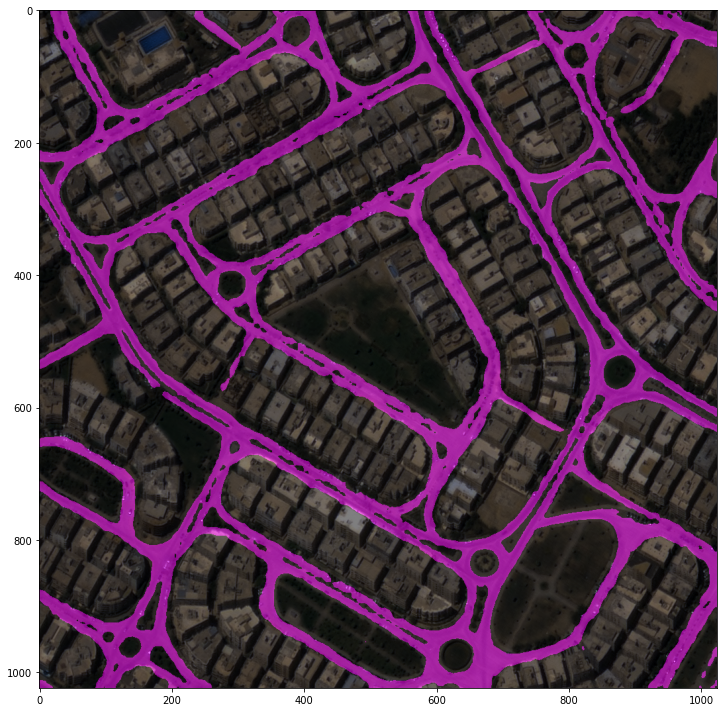

In [ ]:
model.cfg = cfg

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD00173_PS3_K3A_NIA0276.png')
result = inference_segmentor(model, img)
plt.figure(figsize=(10, 10))
show_result_pyplot(model, img, result, palette)

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 720x720 with 0 Axes>

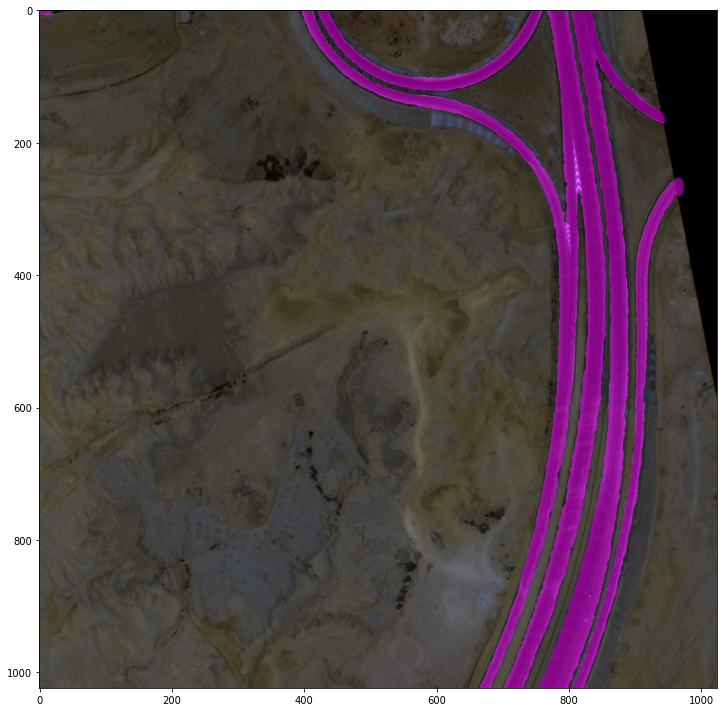

In [ ]:
img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD00358_PS3_K3A_NIA0276.png')
result = inference_segmentor(model, img)
plt.figure(figsize=(10, 10))
show_result_pyplot(model, img, result, palette)

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 720x720 with 0 Axes>

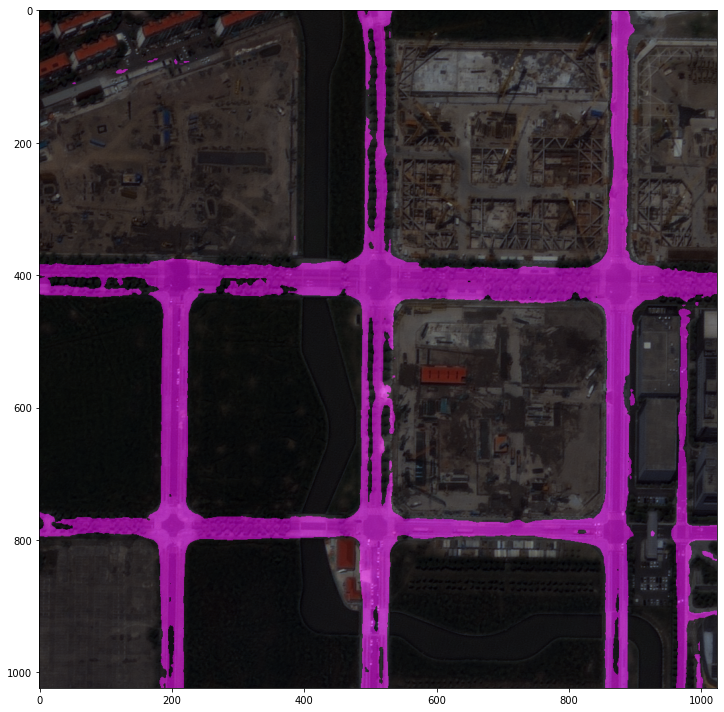

In [ ]:
img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD01289_PS3_K3A_NIA0373.png')
result = inference_segmentor(model, img)
plt.figure(figsize=(10, 10))
show_result_pyplot(model, img, result, palette)

In [ ]:
checkpoint_file = '/content/drive/Shareddrives/msmg/level1/source/road/segformer/mit-b5/no2_iter15000_checkpoint/best_mIoU_iter_XXXX.pth'  # 학습된 가중치 파일

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_segmentor(cfg, checkpoint_file, device='cuda:0')  #cuda gpu 사용

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD11474_PS3_K3A_NIA0390.png') # inference할 이미지
result = inference_segmentor(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, palette)

### Inference and evaluation on the test dataset

In [ ]:
import torch, torchvision

import mmseg
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset
from mmseg.apis import set_random_seed

import mmcv
from mmcv import Config

import matplotlib.pyplot as plt
import os.path as osp
import numpy as np
from PIL import Image

In [ ]:
# convert dataset annotation to semantic segmentation map
data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road'
img_dir = 'image'
ann_dir = 'annotation'

# define class and plaette for better visualization
classes = ('background', 'road')
palette = [[0, 0, 0], [255, 0, 255]]

In [ ]:
config_file = '/content/mmsegmentation/configs/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes.py'
checkpoint_file = '/content/mmsegmentation/checkpoints/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth'
save_pth_path = '/content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint'

In [ ]:
@DATASETS.register_module(force=True)
class RoadSemanticSegmentation(CustomDataset):
    CLASSES = classes
    PALETTE = palette
    def __init__(self, split, **kwargs):
        super().__init__(img_suffix='.png', seg_map_suffix='.png', split=split, **kwargs)
        assert osp.exists(self.img_dir) and self.split is not None

In [ ]:
cfg = Config.fromfile(config_file)

In [ ]:
from mmseg.apis import set_random_seed

# add CLASSES and PALETTE to checkpoint
cfg.checkpoint_config.meta = dict(
    CLASSES=classes,
    PALETTE=palette)

# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
#cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg

# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 2

# modify loss function crossentropy
cfg.model.decode_head.loss_decode= [dict(type='FocalLoss',loss_name = 'loss_focal', alpha = 0.8, loss_weight=0.8),
                                    dict(type='LovaszLoss',loss_name = 'loss_lovasz',per_image=False, 
																		 reduction='none',  loss_type='multi_class',classes='all',class_weight=[0.5, 1.0], loss_weight=0.2)]
    
#cfg.model.test_cfg.mode = 'whole'
#del cfg['model']['test_cfg']['crop_size']
#del cfg['model']['test_cfg']['stride']

# Modify dataset type and path
cfg.dataset_type = 'RoadSemanticSegmentation'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 6
cfg.data.workers_per_gpu = 6

# Albumentations transforms settings
albu_train_transforms = [
    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomRotate90', p=1.0)
    ], p=0.5),

    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomBrightnessContrast',brightness_limit=0.1, contrast_limit=0.15, p=1.0),
        dict(type='CLAHE', clip_limit=4.0, tile_grid_size=(8, 8), always_apply=False, p=1.0),
        dict(type='HueSaturationValue', hue_shift_limit=15, sat_shift_limit=25, val_shift_limit=10, p=1.0),
    ], p=0.5)
]

# pipline
cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (512, 512)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(1024, 1024), ratio_range=(0.5, 1.5)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(
        type='Albu',
        transforms=albu_train_transforms,
        keymap=dict(img='image', gt_semantic_seg='mask'),
        update_pad_shape=True,
        ),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1024, 1024),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]

cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road/'
cfg.data.train.img_dir = 'image'
cfg.data.train.ann_dir = 'annotation'
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'split/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/road/'
cfg.data.val.img_dir = 'image'
cfg.data.val.ann_dir = 'annotation'
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'split/validation.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/road/'
cfg.data.test.img_dir = 'image'
cfg.data.test.ann_dir = 'annotation'
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'split/validation.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = checkpoint_file

# Set up working dir to save files and logs.
cfg.work_dir = save_pth_path

cfg.runner.max_iters = 10000
cfg.log_config.interval = 10
cfg.evaluation.interval = 100
cfg.evaluation.save_best = 'mIoU'
cfg.checkpoint_config.interval = 2000

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained=None,
    backbone=dict(
        type='MixVisionTransformer',
        in_channels=3,
        embed_dims=64,
        num_stages=4,
        num_layers=[3, 6, 40, 3],
        num_heads=[1, 2, 5, 8],
        patch_sizes=[7, 3, 3, 3],
        sr_ratios=[8, 4, 2, 1],
        out_indices=(0, 1, 2, 3),
        mlp_ratio=4,
        qkv_bias=True,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.1,
        init_cfg=dict(type='Pretrained', checkpoint='pretrain/mit_b5.pth')),
    decode_head=dict(
        type='SegformerHead',
        in_channels=[64, 128, 320, 512],
        in_index=[0, 1, 2, 3],
        channels=256,
        dropout_ratio=0.1,
        num_classes=2,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=[
            dict(
                type='FocalLoss',
                loss_name='loss_focal',


load checkpoint from local path: /content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_8700.pth


/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


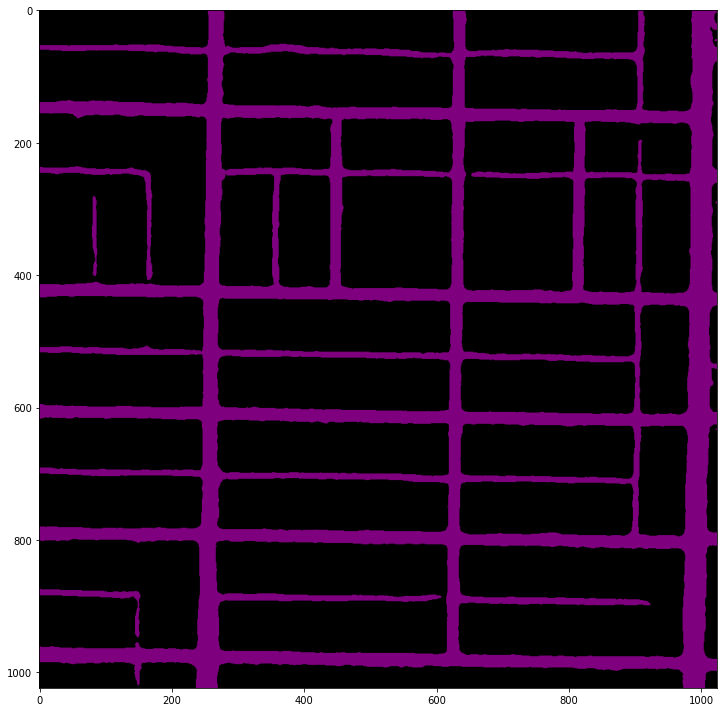

In [ ]:
checkpoint_file = '/content/drive/Shareddrives/msmg/loss test/ngjw/road_segformer_no4_iter10000_checkpoint/best_mIoU_iter_8700.pth'  # 학습된 가중치 파일

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_segmentor(cfg, checkpoint_file, device='cuda:0')  #cuda gpu 사용

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD11474_PS3_K3A_NIA0390.png') # inference할 이미지
result = inference_segmentor(model_ckpt, img)
show_result_pyplot(model_ckpt, np.array([0, 0, 0]), result, palette)

In [ ]:
from mmseg.datasets import (build_dataloader, build_dataset)

# test용 Dataset과 DataLoader 생성. 
# build_dataset()호출 시 list로 감싸지 않는 것이 train용 dataset 생성시와 차이. 
dataset = build_dataset(cfg.data.test)
data_loader = build_dataloader(
        dataset,
        # 반드시 아래 samples_per_gpu 인자값은 1로 설정
        #samples_per_gpu=cfg.data.samples_per_gpu,
        #workers_per_gpu=cfg.data.workers_per_gpu,
        samples_per_gpu=1,
        workers_per_gpu=1,
        dist=False,
        shuffle=False)

2022-06-04 14:28:45,173 - mmseg - INFO - Loaded 127 images


In [ ]:
from mmseg.apis import multi_gpu_test, single_gpu_test
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
#from mmseg.apis import inference_detector, init_detector, show_result_pyplot

model_ckpt = MMDataParallel(model_ckpt, device_ids=[0])

In [ ]:
# single_gpu_test() 를 호출하여 test데이터 세트의 interence 수행. 반드시 batch size는 1이 되어야 함. 
# 위에서 만든 /content/show_test_output 디렉토리에 interence 결과가 시각화된 이미지가 저장됨. 
outputs = single_gpu_test(model_ckpt, data_loader, False, '/content/test', 1.0)

[                                                  ] 0/127, elapsed: 0s, ETA:

/content/mmsegmentation/mmseg/apis/test.py:69: UserWarning: DeprecationWarning: ``efficient_test`` will be deprecated, the evaluation is CPU memory friendly with pre_eval=True
  'DeprecationWarning: ``efficient_test`` will be deprecated, the '


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 1.4 task/s, elapsed: 88s, ETA:     0s

In [ ]:
metric = dataset.evaluate(outputs, metric='mIoU')
print(metric)

per class results:

+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 94.86 | 97.56 |
|    road    |  63.7 | 76.54 |
+------------+-------+-------+
Summary:

+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.29 | 79.28 | 87.05 |
+-------+-------+-------+
{'aAcc': 0.9529000000000001, 'mIoU': 0.7928000000000001, 'mAcc': 0.8704999999999999, 'IoU.background': 0.9486, 'IoU.road': 0.637, 'Acc.background': 0.9756, 'Acc.road': 0.7654000000000001}
